# AST 443 Lab 3: Estimates of temperature and density of planetary nebula NGC 6543 through emission-line spectroscopy

Author: 112166935

Co-Authors: 112601517, 112695826

# 1 Introduction and General Strategy

In 1864, the first spectrum of a planetary nebula, NGC 6543, was obtained by William Huggins [4]. Planetary nebulae are formed by over 90% of stellar deaths and have masses of 1-6 $M_\odot$. In a planetary nebula, a ring of gas is ionized by a central white dwarf; this gas emits radiation at certain wavelengths, yielding emission lines in the nebula spectrum.

Planetary nebula see applications in analyzing stellar populations and tracing dark matter, so it is of great scientific importance to characterize their emission lines through spectroscopy.

In this lab we perform emission-line spectroscopy on the planetary nebula NGC 6543, also named the Cat's Eye Nebula [2]. We use the star Zeta Draconis, a star of spectral type B6, as our spectrophotometric reference star. 

We observe the Oxygen [O III] emission lines to determine the temperature of the nebula $(K)$, and we observe the Argon [Ar IV] emission lines to determine the density of the nebula $(cm^{-3})$. In particular, the following emission lines are of interest:
* [O III] - $4363 \unicode[serif]{xC5}$
* [O III] - $4959 \unicode[serif]{xC5}$
* [O III] - $5007 \unicode[serif]{xC5}$
* [Ar IV] - $4711 \unicode[serif]{xC5}$
* [Ar IV] - $4740 \unicode[serif]{xC5}$

We calculate the temperature of the nebula $T$ (in units of $K$) from the relative fluxes of the oxygen emission lines using the following formula assuming $n_e \approx 10^{3} \text{cm}^{-3}$.

$$\frac{F[4959]+F[5007]}{F[4363]} = \frac{7.90 \exp(3.29 \times 10^4/T)}{1 + 4.5\times 10^{-4} n_e T^{-1/2}}$$

With the nebula temperature $T$ determined, we calculate a more precise gas density $n_e$ from the argon flux ratio $F[4711]/F[4740]$ by visual inspection of the $F[4711]/F[4740]$ vs $n_e$ graph.

# 2 Data Acquisition


## 2.1 Equipment and Software

Equipment
* High-resolution spectrograph with 9000/mm grating
* ST402ME Spectroscopy CCD camera
* AutoGuider
* Laptop

Software
* PhDGuide to control the AutoGuider in order to maintain alignment of the target on the spectrograph slit
* Cartes du Ciel to slew telescope to target and track target

## 2.2 Procedure

We use the high-resolution spectrograph, with 9000/mm grating, and the Spectroscopy CCD to conduct observations.

We begin by focusing the spectrograph visually. We shine a neon lamp into the spectrograph entry port and focus such that we can see neon emission lines clearly.

We calibrate the spectrograph for the $4363-5007\unicode[serif]{xC5}$ wavelength range using a mercury lamp. The spectrograph has a range of approximately $700\unicode[serif]{xC5}$, and we want our outermost spectral lines [O III 4363] and [O III 5007] to be approximately 20 pixels from the edge of the image. This is possible to be done with a single mercury lamp calibration. The mercury lamp has a strong emission line spectrum [Appendix A1], which we use to identify our desired $4363-5007\unicode[serif]{xC5}$ wavelength range

We use the conversion factor of $1 \unicode[serif]{xC5} = 10 nm$.

Next, we focus the spectrograph. We focus on the mercury emission lines such that they are clearly visible in CCDSoft. We rotate the spectrograph and CCD with respect to each other until the mercury lines are aligned horizontally.

We mount the spectrograph and CCD setup on the Mount Stony Brook Observatory telescope to gather light. The light passes through the telescope, then the spectrograph, before reaching pixels on the CCD. We connect the AutoGuider camera to another port on the spectrograph. We rotate the AutoGuider until the central light square aligns cardinally with the PhDGuide display window, and we focus the AutoGuider until we clearly see the spectrograph slits in PhDGuide.

We connect the spectrograph-telescope setup to a computer with the Cartes du Ciel software running. After slewing to our reference star, Zeta Draconis, we adjust the telescope position until it is centered in PhDGuide. We select a nearby star on which to track with PhDGuide, making sure to keep Zeta Draconis in the center of the $50\mu\mathrm{m}$ slit. We maintain Zeta Draconis in position until we finish taking spectra. We repeat this process with the NGC 6543 nebula, but with keeping the nebula on one side of the slit instead of the center.

# 3 Data Reduction

In order to perform data analysis, we must perform all the necessary reduction steps on the raw data. The raw data must undergo the following data reduction procedures:

* Dark current correction: Due to thermal motion and quantum tunneling of the CCD electrons, the CCD will always display nonzero counts even when the shutter is closed and not exposed to light. We need to subgtract the dark current contribution so that our data only depends on light that actually enters the camera.

* Flat-field sensitivity correction: The spectrograph and CCD setup exhibits variations in sensitivity between different pixels. One reason is vignetting, where the center of the image is more sensitive than the edges. Another reason is that the spectrograph exhibits "wiggles" of alternating high and low sensitivy variation between wavelength intervals. The flat-field sensitivity correction allows us to determine the local oscillating sensitivity variations and smooth them out with a polynomial fit function.

* Sky background correction: The counts of a given column of the spectral image include light from both the target (nebula or star) and the sky, due to light pollution. We are interested in conducting spectroscopy only on emission lines of interest from our target. Contributions from the sky in the same emission lines would skew emission line strengths and thereby skew the [O III] and [Ar IV] emission line ratios used to calculate temperature and density, respectively. In addition, the sky background could contribute emission lines that are close to our target emission lines, leading to confusion in identifying our target emission lines.

* 1D spectrum: The 1D spectrum can be seen as the median of each column of the 2D spectrograph image. We use a 1D spectrum because the intensity values depend solely on the x-position, which corresponds to wavelength through the spectrograph and wavelength dispersion relation. However, a 2D spectrum would also have an undesired row-coordinate dependence, which would unnecessarily complicate calculation of emission line strengths.

* Dispersion relation: In order to transform the x-coordinates in the spectrograph images to wavelengths, we need to calculate the dispersion relation of the spectrograph. We do this by matching wavelengths of emission lines from the Lab 3 manual [3] to the x-coordinates of emission lines in our nebula images.

* Sensitivity function: Even after correcting for dark current, flat-field sensitivity, and sky background, the spectrograph may be intrinsically more sensitive to certain wavelengths than others. We take a spectrum of a black-body emitter, in this case a spectrophotometric type B or A star, in order to determine this sensitivity function. We compare the measured intensity (counts) values of the star spectrum to its Planck function to determine that the spectrograph is more sensitive in longer wavelengths than shorter wavelengths. We divide the 1D spectrum by this sensitivity function to remove long-range sensitivity variation in the spectrograph.

We begin by importing all necessary modules, with their purposes described in the subsequent cell:

In [1]:
### for array operations
import numpy as np

### for plotting
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

### for operations on FITS images
from astropy.io import fits

### statistics functions needed in this tutorial
from scipy import stats
from scipy.stats import norm
from scipy.stats import mode
import scipy as sp

### for changing directory
import os

### for displaying images (not very good but better than nothing)
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.visualization import simple_norm

### for curve fitting
from scipy.optimize import curve_fit

### for auto-completing things in loops
import glob

### for table file generation
import pandas as pd

### for integration
from scipy.integrate import quad

### for showing images
from IPython.display import Image


## 3.1 Dark current and flat-field sensitivity

We create the master dark frames and master flat fields. We create a master dark for each exposure time used in our observations and flat fields: 6 min, 8 min, 10 min, 20 min, 40 sec.

The purpose of a dark frame is to correct the science images for dark current.

The purpose of a flat field is to correct the science images for local variations in sensitivity in the spectrograph.

### Night 1

The raw flat fields have an exposure time of 180 seconds, or 3 minutes. The flat-fields are autodarked, which means that a dark frame of the same exposure time is automatically taken for each set of flats and subtracted from each flat. As a result, the flat-fields already dark-corrected and the master flat for Night 1 can simply be taken as the median of the raw flat-field files, named 'DomeFlt.0000*.FIT'.

Night 1 master flat = median(Night 1 flats)

### Night 2

The raw flat-fields have an exposure time of 6 minutes. The flat-fields are not autodarked. Therefore, we manually take a dark frame of the same exposure time as our flat fields and subtract the dark from the flats to produce dark-calibrated flats. Therefore, we obtain our calibrated flat-fields as follows:

* Night 2 calibrated flat = (Night 2 raw flat) - (Master dark 6 min)

Next, we obtain our master flat as follows:

* Night 2 master flat = median(Night 2 calibrated flats)

In [2]:
### Here we create all the masterdarks and all masterflats
### Note that night 1 flats were autodarked, while night 2 flats were darked manually.

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/DARKS')

### Make list of darks
darksList6Min = sorted(glob.glob('new6mindark.0000*.DARK.FIT'))
darksData6Min = [fits.open(filename)[0].data for filename in darksList6Min]

### Create a median of all darks
darksMedian6Min = np.median(darksData6Min,axis=0)

### Write out masterdark
masterDark6Min = fits.PrimaryHDU(darksMedian6Min)
masterDark6Min.writeto('masterDark6Min.fits', overwrite=True)

print("Master Dark 6 Min Created.")

### Make list of darks
darksList8Min = sorted(glob.glob('dark08min.0000*.DARK.FIT'))
darksData8Min = [fits.open(filename)[0].data for filename in darksList8Min]

### Create a median of all darks
darksMedian8Min = np.median(darksData8Min,axis=0)

### Write out masterdark
masterDark8Min = fits.PrimaryHDU(darksMedian8Min)
masterDark8Min.writeto('masterDark8Min.fits', overwrite=True)

print("Master Dark 8 Min Created.")

### Make list of darks
darksList10Min = sorted(glob.glob('dark10min.0000*.DARK.FIT'))
darksData10Min = [fits.open(filename)[0].data for filename in darksList8Min]

### Create a median of all darks
darksMedian10Min = np.median(darksData10Min,axis=0)

### Write out masterdark
masterDark10Min = fits.PrimaryHDU(darksMedian10Min)
masterDark10Min.writeto('masterDark10Min.fits', overwrite=True)

print("Master Dark 10 Min Created.")

### Make list of darks
darksList20Min = sorted(glob.glob('new20mindark.0000*.DARK.FIT'))
darksData20Min = [fits.open(filename)[0].data for filename in darksList20Min]

### Create a median of all darks
darksMedian20Min = np.median(darksData20Min,axis=0)

### Write out masterdark
masterDark20Min = fits.PrimaryHDU(darksMedian20Min)
masterDark20Min.writeto('masterDark20Min.fits', overwrite=True)

print("Master Dark 20 Min Created.")

### Make list of darks
darksList40Sec = sorted(glob.glob('new40secdark.0000*.DARK.FIT'))
darksData40Sec = [fits.open(filename)[0].data for filename in darksList40Sec]

### Create a median of all darks
darksMedian40Sec = np.median(darksData40Sec,axis=0)

### Write out masterdark
masterDark40Sec = fits.PrimaryHDU(darksMedian40Sec)
masterDark40Sec.writeto('masterDark40Sec.fits', overwrite=True)

print("Master Dark 40 Sec Created.")

# Change to flats

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/FLATS')

### Make list of flats
flatsList = sorted(glob.glob('DomeFlt.0000*.FIT'))
flatsData = [fits.open(filename)[0].data for filename in flatsList]

### Create a median of all flats
flatsMedian = np.median(flatsData,axis=0)

### Write out
masterFlat = fits.PrimaryHDU(flatsMedian)
masterFlat.writeto('masterFlatNight1.fits', overwrite=True)

print("Master Flat Night 1 Created.")

### First, subtract master dark 6 min from each image
### Create a median of all flats, then divide that median by the mode of that median image to make normalized median flat.

# Change to night 2 flats directory
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/FLATS/night2Flats')

for i in glob.glob('*.FIT'):
    hduflat = fits.open(i)
    imageflat = hduflat[0].data
    
    calibflat = imageflat - darksMedian6Min
    
    ### Annoying string manipulation to get file number
    prenumber = i.replace("domeflat6min.","")
    number = prenumber.replace(".FIT", "")
    
    calibflatimage = fits.PrimaryHDU(calibflat)
    print(number)
    calibflatimage.writeto('calibflat.' + number + '.fits', overwrite = 'overwrite')
print('Calib Flats Night 2 Created.')

### Make list of flats
flatsListNight2 = sorted(glob.glob('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/FLATS/calibflat.0000*.fits'))
flatsDataNight2 = [fits.open(filename)[0].data for filename in flatsListNight2]

### Create a median of all flats
flatsMedianNight2 = np.median(flatsDataNight2,axis=0)

### Write out
masterFlatNight2 = fits.PrimaryHDU(flatsMedianNight2)
masterFlatNight2.writeto('masterFlatNight2.fits', overwrite=True)

print("Master Flat Night 2 Created.")

Master Dark 6 Min Created.
Master Dark 8 Min Created.
Master Dark 10 Min Created.
Master Dark 20 Min Created.
Master Dark 40 Sec Created.
Master Flat Night 1 Created.
00000000
00000001
00000002
00000003
00000004
Calib Flats Night 2 Created.
Master Flat Night 2 Created.


## 3.2 1D spectrum of data

We observed our target nebula NGC 6543 and reference star Zeta Draconis in the $50\mu m$ slit of the spectrograph. Therefore, we slice our images to the rows corresponding to the $50\mu m$ slit. The $50\mu m$ slit begins at row 23 and ends at row 83 of the master flat images for Night 1 and Night 2. Therefore, our slicing indices run from 22 to 83. 

We begin by analyzing the master flat fields for Night 1 to determine the calibration functions needed to apply to the Night 1 science images. We slice the master flat image with the command

`flatsSpliceMedian = flatsMedian[22:83]`

We obtain a 1D spectrum of our Night 1 master flat by taking the median of each column of the image. However, we need to transpose the data and take the median of each resulting row of the transpose in order to properly execute the numpy `median()` function.

`flatsTransSpliceMedian = np.transpose(flatsSpliceMedian)`

`medianCounts = np.median(flatsTransSpliceMedian, axis = 1)`

We repeat the above steps to obtain the 1D spectrum of our Night 2 master flat.

In [3]:
### Plot spliced flats and make a low order polynomial fit, same as in lab 1 spectroscopy. 

### Data manipulation
flatsSpliceMedian = flatsMedian[22:83] # splice to 50 micron rows. 3rd slit begins at row 23, ends at row 83 

flatsTransSpliceMedian = np.transpose(flatsSpliceMedian) # transpose to get [[col0] [col1] ... [col765]]

medianCounts = np.median(flatsTransSpliceMedian, axis = 1) #median all axis 1 arrays [med0 med1 ... med765]

### Important to print any of these steps to convince yourself this is correct

flatsSpliceMedianNight2 = flatsMedianNight2[22:83] # splice to 50 micron rows. 3rd slit begins at row 23, ends at row 83 

flatsTransSpliceMedianNight2 = np.transpose(flatsSpliceMedianNight2) # transpose to get [[col0] [col1] ... [col765]]

medianCountsNight2 = np.median(flatsTransSpliceMedianNight2, axis = 1) #median all axis 1 arrays [med0 med1 ... med765]


We plot counts vs x-coordinate position to see the distribution of the 1D spectra of the master flats. For both Night 1 (blue curve) and Night 2 (orange curve), we observe that the median counts per column tend to increase with x-coordinate.

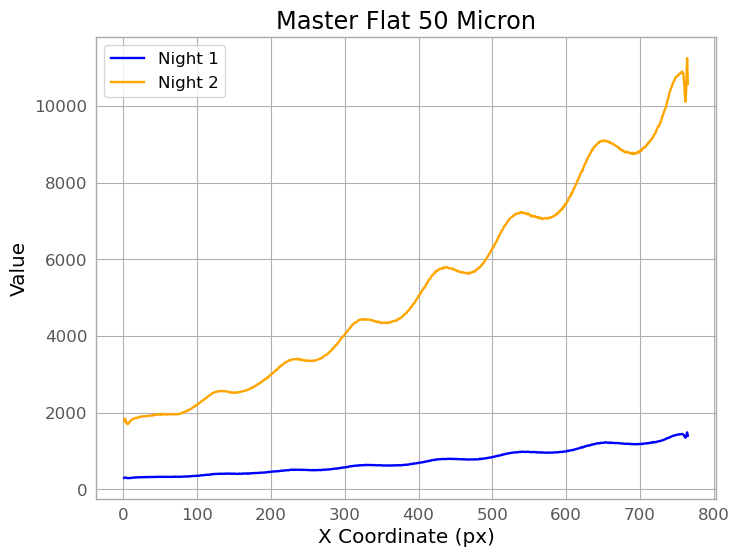

In [4]:

### Plot a histogram (median of each column of the 3rd slit)
slitXValues = np.arange(765)+1
slitYValues = np.arange(61)+1

plt.grid(True)
plt.plot(slitXValues, medianCounts, c = 'blue') # Night 1 master flat 1D counts
plt.plot(slitXValues, medianCountsNight2, c = 'orange') # Night 2 master flat 1D counts
plt.title('Master Flat 50 Micron')
plt.xlabel('X Coordinate (px)')
plt.ylabel('Value')
plt.legend(["Night 1", "Night 2"], loc ="upper left");

However, we also notice that the counts exhibit local oscillations in addition to their overall increasing trend. This indicates that the spectrograph sensitivity oscillates locally and tends to increase globally.

We fit a polynomial function of degree 2 to each 1D master flat spectrum in order to correct for the local oscillations. We use the `np.polyfit()` function with x-values $x=$ `slitXValues` corresponding to slit position and y-values $y_1=$ `medianCounts` or $y_2=$ `medianCountsNight2` corresponding to median counts per column. This function returns the parameters of the best-fit polynomial function.

`polyFit = np.polyfit(slitXValues, medianCounts, 2)`

We obtain the following polynomial fit equations for Night 1 and Night 2:

Night 1: $\hat{y_1} = 0.00112927772 x^2 + .566325474 x + 298.302075$

Night 2: $\hat{y_2} = 0.00857708485 x^2 + 5.02172389 x + 1661.35871$

Using the parameters of the polynomial fit for Night 1 and Night 2, we calculate an array of fitted y-value counts corresponding to each column, $\hat{y_1}=$ `yPolyFitValues` for Night 1 and $\hat{y_2}=$ `yPolyFitValuesNight2` for Night 2.

We superimpose the polynomial fit curves over the 1D spectra of the master flats.

[1.12927772e-03 5.66325474e-01 2.98302075e+02]
[8.57708485e-03 5.02172389e+00 1.66135871e+03]


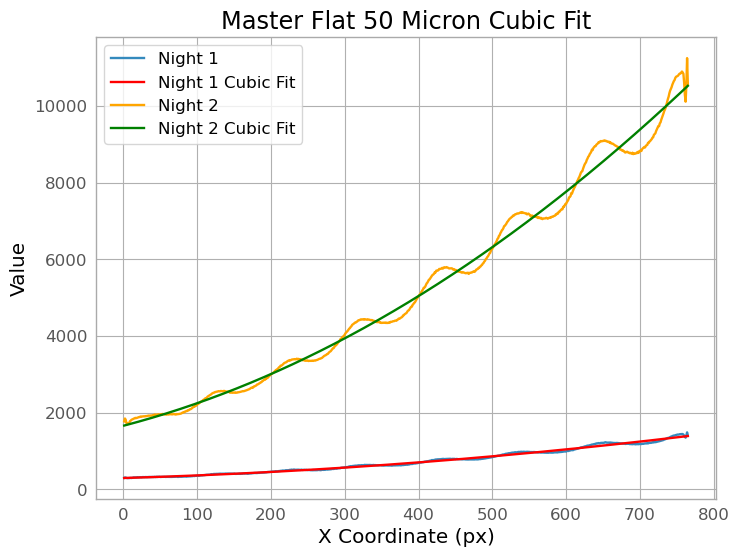

In [5]:
### Find a best fit with a quadratic fit
polyFit = np.polyfit(slitXValues, medianCounts, 2)
polyFitNight2 = np.polyfit(slitXValues, medianCountsNight2, 2)
print(polyFit)
print(polyFitNight2)

### Evaluate the function at integers from 0 to 765 for the plot
yPolyFitValues = [polyFit[0]*x**2 + polyFit[1]*x + polyFit[2] for x in slitXValues]
yPolyFitValuesNight2 = [polyFitNight2[0]*x**2 + polyFitNight2[1]*x + polyFitNight2[2] for x in slitXValues]

### Plot both the data and the best fit
plt.grid(True)
plt.plot(slitXValues,medianCounts)
plt.plot(slitXValues,yPolyFitValues, c = 'red')
plt.plot(slitXValues, medianCountsNight2, c = 'orange')
plt.plot(slitXValues,yPolyFitValuesNight2, c = 'green')
plt.title('Master Flat 50 Micron Cubic Fit')
plt.xlabel('X Coordinate (px)')
plt.ylabel('Value')
plt.legend(["Night 1", "Night 1 Cubic Fit", "Night 2", "Night 2 Cubic Fit"], loc ="upper left");

Our goal is to normalize the 2D master flat spectra by their respective polynomial fits to determine their local spectrogram sensitivity variation, or gain. In order to get an idea of the expected result, we first normalize each 1D master flat spectrum by its respective polynomial fit as follows:

Night 1 flat-field gain = (Night 1 median counts) / (Night 1 polynomial fit counts)

Night 2 flat-field gain = (Night 2 median counts) / (Night 2 polynomial fit counts)

The local spectrogram sensitivity variation corresponds to the flat-field gain for Night 1 and Night 2. The global spectrogram sensitivity variation may result from the flat-field calibration light source (dome lights) emitting more strongly in certain wavelength regions than in others.

We plot the flat-field gains with respect to pixel x-coordinate and notice a sinusoidal variation in the flat-field gain. We expect a similar sinusoidal gain variation when we normalize the 2D master flats by their respective polynomial fit functions.

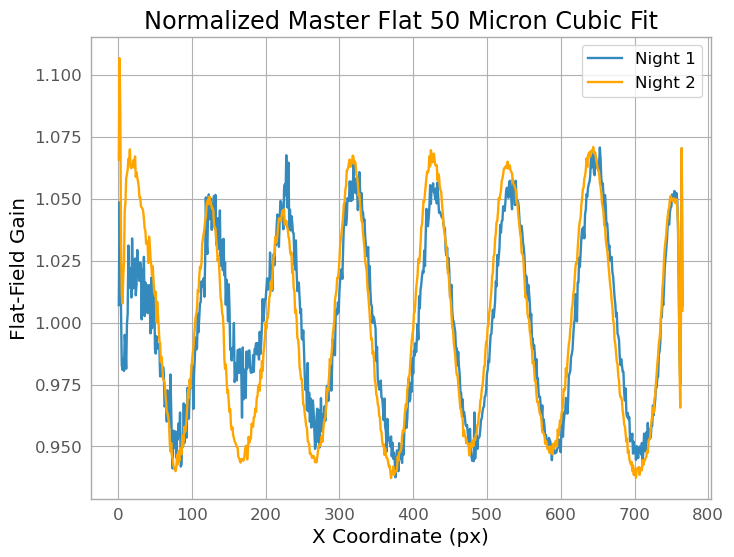

In [6]:
### Plot 1D normalization (Divide the flat field pixel counts by polynomial fit function)
yPolyFitValuesNorm = np.divide(medianCounts, yPolyFitValues)
yPolyFitValuesNormNight2 = np.divide(medianCountsNight2, yPolyFitValuesNight2)

plt.grid(True)
plt.plot(slitXValues,yPolyFitValuesNorm)
plt.plot(slitXValues,yPolyFitValuesNormNight2, c = 'orange')
plt.title('Normalized Master Flat 50 Micron Cubic Fit')
plt.xlabel('X Coordinate (px)')
plt.ylabel('Flat-Field Gain')
plt.legend(["Night 1", "Night 2"], loc ="upper right");

Before we normalize the 2D master flats $y_1$ (Night 1) and $y_2$ (Night 2) by their respective polynomial fits, we need to tile their 1D polynomial fit function values $\hat{y_1}$ and $\hat{y_2}$ using the numpy `tile()` function. We note that there are 61 rows between rows 22 and 83, as we had sliced earlier. Therefore, we generate the tiled 2D polynomial fit values as follows:

Night 1: `yPolyFitValuesNorm2D = np.tile(yPolyFitValues, (61,1))`

Night 2: `yPolyFitValuesNorm2DNight2 = np.tile(yPolyFitValuesNight2, (61,1))`

Where the 2D polynomial fit values are `yPolyFitValuesNorm2D`, the original 1D polynomial fit values are `yPolyFitValues`, and we tile the 1D array into `61` rows and `1` column.

We normalize the 2D master flats (e.g. `flatsSpliceMedian` for Night 1) by dividing them by the 2D polynomial fit values (e.g. `yPolyFitValuesNorm2D` for Night 1) with respect to x-coordinate.

For example, for Night 1 we obtain the true master flat with flat-field gain values, `masterFlatSpliceData`:

`masterFlatSpliceData = flatsSpliceMedian/yPolyFitValuesNorm2D`

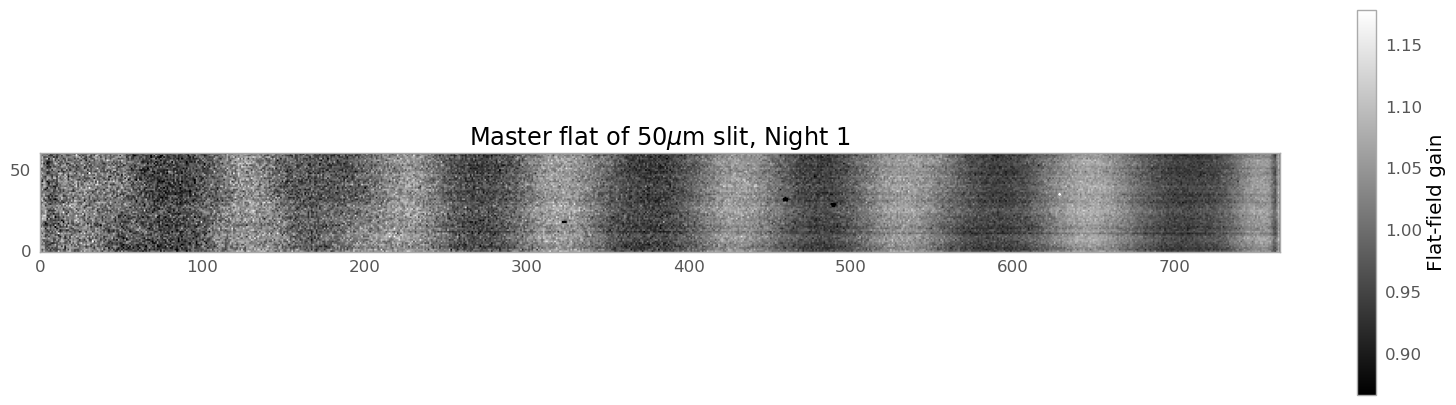

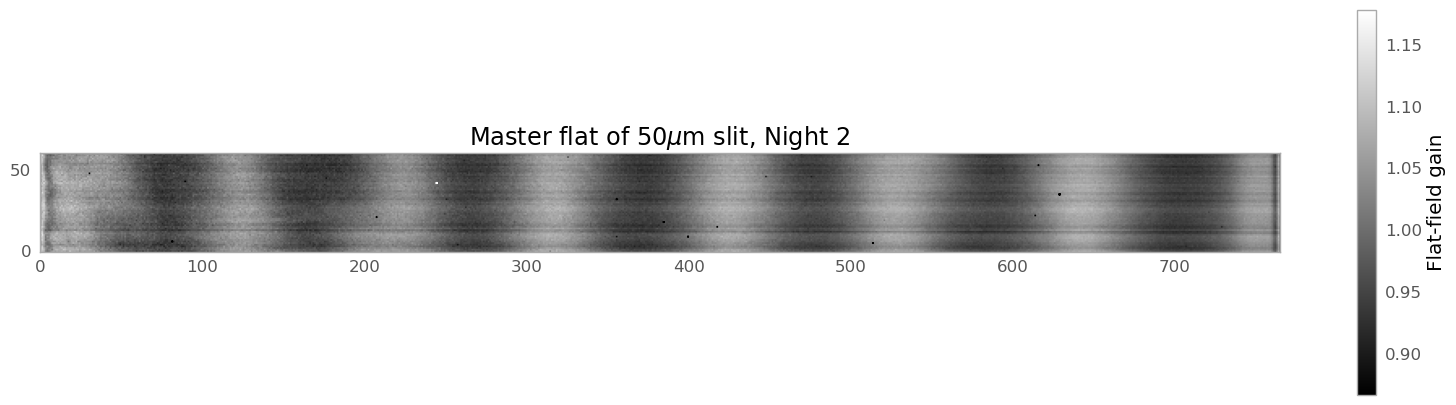

In [7]:
### Create normalized master flat for night 1 and night 2
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/FLATS')

yPolyFitValuesNorm2D = np.tile(yPolyFitValues, (61,1)) #[median row] -> [[med row][med row]...61x]
yPolyFitValuesNorm2DNight2 = np.tile(yPolyFitValuesNight2, (61,1))

masterFlatSpliceData = flatsSpliceMedian/yPolyFitValuesNorm2D #Divide 3rd slit science by array of median rows, dimensions agree
masterFlatSpliceDataNight2 = flatsSpliceMedianNight2/yPolyFitValuesNorm2DNight2

masterFlatSplice = fits.PrimaryHDU(masterFlatSpliceData)
masterFlatSplice.writeto('masterFlatSpliceNight1.fits', overwrite='overwrite')

masterFlatSpliceNight2 = fits.PrimaryHDU(masterFlatSpliceDataNight2)
masterFlatSpliceNight2.writeto('masterFlatSpliceNight2.fits', overwrite='overwrite')

# Master flat of our slit data for Night 1
plt.figure(figsize=(20,5))
plt.grid(False)
plt.imshow(masterFlatSpliceData, cmap='gray', vmin=0.867, vmax=1.178,origin='lower')
plt.title('Master flat of $50\mu$m slit, Night 1')
plt.colorbar(label='Flat-field gain')

plt.figure(figsize=(20,5))
plt.grid(False)
plt.imshow(masterFlatSpliceDataNight2, cmap='gray', vmin=0.867, vmax=1.178,origin='lower')
plt.title('Master flat of $50\mu$m slit, Night 2')
plt.colorbar(label='Flat-field gain');

`masterFlatSpliceNight1.fits` and `masterFlatSpliceNight2.fits` are the true master flat fields with local flat-field gain values. We use these master flats to calibrate our science images.

Science Images - Nebula

We open our science images to perform analysis. We obtain each calibrated science image `calibsci` as follows:

* We slice the raw science image `imagesci` and the 8-minute master dark `darksMedian8Min` to the same rows as the master flats, `[22:83]`.

* We subtract the 8-minute master dark `darksMedian8Min` from the raw science image `imagesci'.

* We divide the difference by the 2D master flat `masterFlatSpliceData`.

`calibsci` = `(imagesci[22:83] - darksMedian8Min[22:83]) / (masterFlatSpliceData)`

We create the master science image by taking the median of all calibrated science images.

We repeat this process for Night 1 and Night 2.

In [8]:
### Now we make all the master sciences for N1 and N2
### For each science, subtract dark, then divide by flat. Then median all sciences together into master science.

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Nebula')

for i in glob.glob('*.FIT'):
    hdusci = fits.open(i)
    imagesci = hdusci[0].data
    
    calibsci = (imagesci[22:83] - darksMedian8Min[22:83]) / masterFlatSpliceData
    
    ### Annoying string manipulation to get file number
    prenumber = i.replace("TrueNeb.","")
    number = prenumber.replace(".FIT", "")
    
    calibsciimage = fits.PrimaryHDU(calibsci)
    calibsciimage.writeto('calibsci.' + number + '.fits', overwrite = 'overwrite')
print('Calib Science Night 1 Created.')

### Make list of science
scienceList = sorted(glob.glob('calibsci.0000*.fits'))
scienceData = [fits.open(filename)[0].data for filename in scienceList]

### Create a median of all science
scienceMedian = np.median(scienceData,axis=0)

### Write out masterscience
masterScience = fits.PrimaryHDU(scienceMedian)
masterScience.writeto('masterScience.fits', overwrite=True)

print("Master Science Night 1 Created")

# Change directory to nebula night 2

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Nebula2')

for j in glob.glob('*.FIT'):
    hdusci2 = fits.open(j)
    imagesci2 = hdusci2[0].data
    
    calibsci2 = (imagesci2[22:83] - darksMedian20Min[22:83]) / masterFlatSpliceDataNight2
    
    ### Annoying string manipulation to get file number
    prenumber2 = j.replace("trueneb.","")
    number2 = prenumber2.replace(".FIT", "")
    
    calibsci2image = fits.PrimaryHDU(calibsci2)
    calibsci2image.writeto('calibsci2.' + number2 + '.fits', overwrite = 'overwrite')
print('Calib Science Night 2 Created.')

### Make list of science
scienceList2 = sorted(glob.glob('calibsci2.0000*.fits'))
scienceData2 = [fits.open(filename)[0].data for filename in scienceList2]

### Create a median of all science
scienceMedian2 = np.median(scienceData2,axis=0)

### Write out masterscience
masterScience2 = fits.PrimaryHDU(scienceMedian2)
masterScience2.writeto('masterScienceNight2.fits', overwrite=True)

print("Master Science Night 2 Created");

Calib Science Night 1 Created.
Master Science Night 1 Created
Calib Science Night 2 Created.
Master Science Night 2 Created


C:\Users\henry\AppData\Local\Temp\ipykernel_20544\3546266045.py:10: RuntimeWarning: divide by zero encountered in true_divide
  calibsci = (imagesci[22:83] - darksMedian8Min[22:83]) / masterFlatSpliceData
C:\Users\henry\AppData\Local\Temp\ipykernel_20544\3546266045.py:41: RuntimeWarning: invalid value encountered in true_divide
  calibsci2 = (imagesci2[22:83] - darksMedian20Min[22:83]) / masterFlatSpliceDataNight2


### 3.2.1 Night 1

For the Night 1 master science image, we plot some statistics of each row of the image in order to determine where to cut off the nebula spectrum from the sky background.

We expect the rows with large counts to be the nebula rows, and the rows with small counts to be the sky rows.

We plot the average, median, and maximum counts per row on the x-axis. We offset the curves to the right by 30 units for clarity and to minimize the presence of negative x-values when using a log-scale x-axis. We plot the row number on the y-axis to correspond to the relative position of the rows in the Night 1 science image.

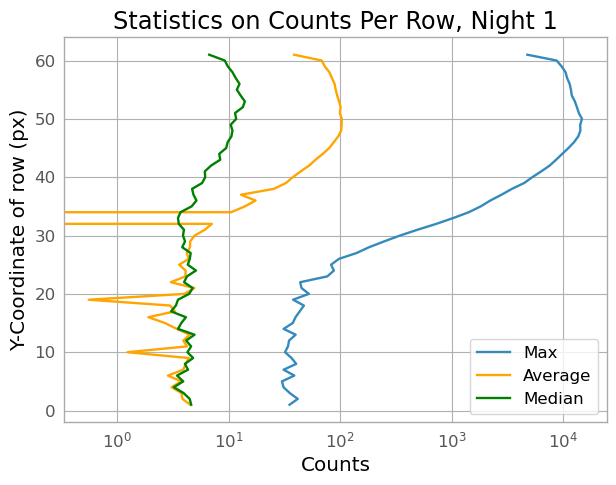

In [9]:
### Plot some statistics by rows to see where to cut off sky from nebula
### Max is the best indicator for uncontaminated sky background
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Nebula/')

rowTest = fits.open('masterScience.fits')

rowTestData = rowTest[0].data

maxes = np.max(rowTestData, axis = 1)
averages = np.average(rowTestData, axis = 1)
medians = np.median(rowTestData, axis = 1)

plt.figure(figsize = (7,5))
plt.grid(True)
plt.plot(maxes+30, slitYValues)
plt.plot(averages+30, slitYValues, c = 'orange')
plt.plot(medians+30, slitYValues, c = 'green')
plt.title('Statistics on Counts Per Row, Night 1')
plt.xlabel('Counts')
plt.ylabel('Y-Coordinate of row (px)')
plt.xscale('log')
plt.legend(["Max", "Average", "Median"], loc ="lower right")

### 3.2.2 Night 2 
We repeat this process for Night 2. Since the count values tend to be much greater than those from Night 1, we offset the curves to the right by 800 units for clarity and to minimize the presence of negative x-values when using a log-scale x-axis.

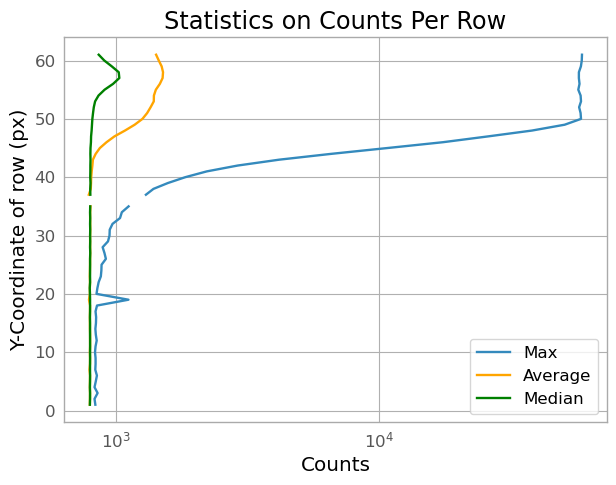

In [10]:
### Plot some statistics by rows to see where to cut off sky from nebula NIGHT 2
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Nebula2/')

rowTestNight2 = fits.open('masterScienceNight2.fits')

rowTestDataNight2 = rowTestNight2[0].data

maxesNight2 = np.max(rowTestDataNight2, axis = 1)
averagesNight2 = np.average(rowTestDataNight2, axis = 1)
mediansNight2 = np.median(rowTestDataNight2, axis = 1)

plt.figure(figsize = (7,5))
plt.grid(True)
plt.plot(maxesNight2+800, slitYValues)
plt.plot(averagesNight2+800, slitYValues, c= 'orange')
plt.plot(mediansNight2+800, slitYValues, c = 'green')
plt.title('Statistics on Counts Per Row')
plt.xlabel('Counts')
plt.ylabel('Y-Coordinate of row (px)')
plt.xscale('log')
plt.legend(["Max", "Average", "Median"], loc ="lower right")

We see that the nebula spectrum rows are mroe clearly defined for Night 2 than for Night 1, as Night 2 was a more clear night and hence yielded lower atmospheric seeing effects. We define the row cutoffs for our nebula and sky as the approximately flat regions of the row count curves. This is because the sloped regions e

Night 1

By inspection, we determine that the sky background occupies rows 1-15 and the nebula spectrum occupies rows 41-62. We cut the master science image into a sky spectrum and a nebula spectrum according to these row cutoffs. Given original science data scienceCalibDataSkyCut, we obtain the following:

* 2D sky background: `scienceCalibDataSkyCut = scienceMedian[1:15]`

* 2D nebula spectrum: `scienceCalibDataNebCut = scienceMedian[41:62]`

Night 2

By inspection, we determine that the sky background occupies rows 1-20 and the nebula spectrum occupies rows 41-62. We cut the master science image into a sky spectrum and a nebula spectrum according to these row cutoffs. Given original science data scienceCalibDataSkyCutNight2, we obtain the following:

* 2D sky background: `scienceCalibDataSkyCutNight2 = scienceMedian2[1:20]`

* 2D nebula spectrum: `scienceCalibDataNebCutNight2 = scienceMedian2[41:62]`

In [11]:
### Define the cuts

# Night 1
nebSkyLow   = 1
nebSkyHigh  = 15
nebNebLow = 41
nebNebHigh = 62

# Night 2
nebSkyLow2   = 1
nebSkyHigh2  = 20
nebNebLow2 = 41
nebNebHigh2 = 62

# Cut the master calib science into nebula spectrum and sky background

# Night 1
scienceCalibDataSkyCut = scienceMedian[nebSkyLow:nebSkyHigh]    # 2D sky background
scienceCalibDataNebCut = scienceMedian[nebNebLow:nebNebHigh]    # 2D nebula spectrum

# Night 2
scienceCalibDataSkyCutNight2 = scienceMedian2[nebSkyLow2:nebSkyHigh2]   # 2D sky background
scienceCalibDataNebCutNight2 = scienceMedian2[nebNebLow2:nebNebHigh2]   # 2D nebula spectrum


We correct our nebula spectra for the sky background and generate our 1D spectra.

We determine the median counts per image column of the sky background as `scienceCalibDataSkyCutMedian`. We sum up all nebula counts per image column to obtain the per-column sum array, `scienceCalibDataNebCutSum`. We calculate the background-adjusted 1D nebula spectrum by subtracting the sky background median from the nebula sum as follows:

(Background-adjusted 1D Nebula Spectrum) = (Nebula Sum) - (# Rows) x (Median of Sky Background)

* Night 1: `science1D = scienceCalibDataNebCutSum - (nebNebHigh - nebNebLow) * scienceCalibDataSkyCutMedian`

* Night 2: `science1DNight2 = scienceCalibDataNebCutSumNight2 - (nebNebHigh - nebNebLow) * scienceCalibDataSkyCutMedianNight2`

After we obtain the background-adjusted 1D nebula spectra, we divide them by their maxima, and then multiply by a "fudge" factor of 250 to obtain convenient intensity values. Thus we obtain normalized 1D spectra of our nebula on Nights 1 and 2.

* Night 1 normalized 1D spectrum: `science1DNorm = science1D / np.nanmax(science1D) * 250`
* Night 2 normalized 1D spectrum: `science1DNormNight2 = science1DNight2 / np.nanmax(science1DNight2) * 250`

We calculate the error spectra by taking the square root of the counts, as CCD counts follow an approximately Poisson distribution.

$\sigma_{counts} = \sqrt{N_{counts}}$

In [12]:
# Make a spectrum

# Night 1 per-column values
scienceCalibDataSkyCutMedian = np.median(scienceCalibDataSkyCut, axis = 0)  # Median of sky background
scienceCalibDataNebCutSum = scienceCalibDataNebCut.sum(axis = 0)            # Sum of nebula counts

# Night 2 per-column values
scienceCalibDataSkyCutMedianNight2 = np.median(scienceCalibDataSkyCutNight2, axis = 0)  # Median of sky background
scienceCalibDataNebCutSumNight2 = scienceCalibDataNebCutNight2.sum(axis = 0)            # Sum of nebula counts

# Generate 1D nebula spectra that are sky-corrected
science1D = scienceCalibDataNebCutSum - (nebNebHigh - nebNebLow) * scienceCalibDataSkyCutMedian
science1DNight2 = scienceCalibDataNebCutSumNight2 - (nebNebHigh - nebNebLow) * scienceCalibDataSkyCutMedianNight2

# Normalize each 1D nebula spectrum by its maximum, then multiply by a scaling "fudge factor" of 250 to get convenient numbers
science1DNorm = science1D / np.nanmax(science1D) * 250                      # Night 1
science1DNormNight2 = science1DNight2 / np.nanmax(science1DNight2) * 250    # Night 2

# Calculate the error values of the 1D spectra
science1DErr = np.sqrt(science1D)
science1DErrNight2 = np.sqrt(science1DNight2)


C:\Users\henry\AppData\Local\Temp\ipykernel_20544\2318918416.py:20: RuntimeWarning: invalid value encountered in sqrt
  science1DErr = np.sqrt(science1D)
C:\Users\henry\AppData\Local\Temp\ipykernel_20544\2318918416.py:21: RuntimeWarning: invalid value encountered in sqrt
  science1DErrNight2 = np.sqrt(science1DNight2)


We plot the normalized 1D spectra of the nebula for both nights.

Night 1 plot:

(-0.5, 1.5)

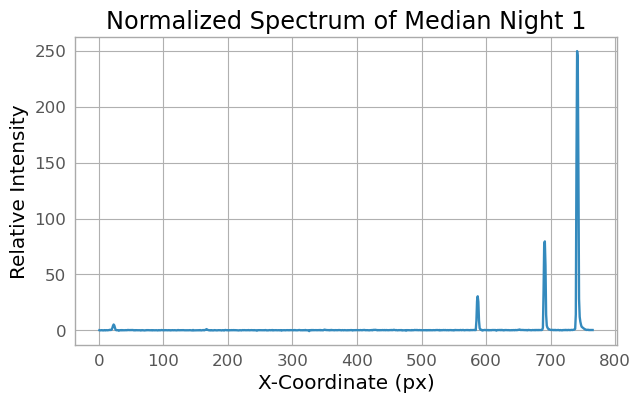

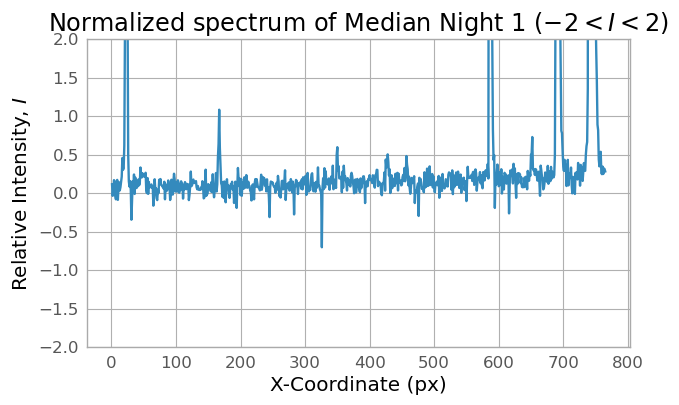

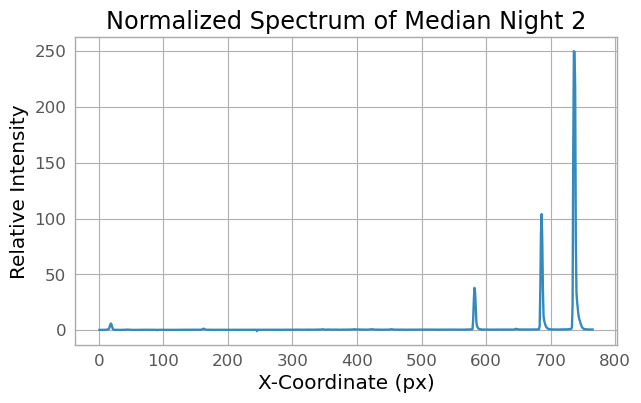

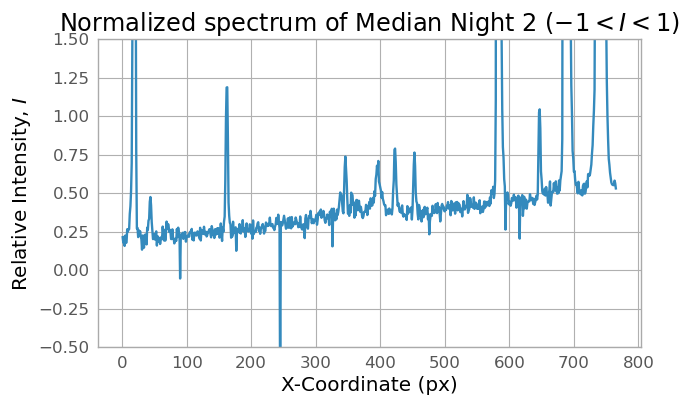

In [13]:
# Night 1 spectrum plot

plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(slitXValues, science1DNorm)
plt.title('Normalized Spectrum of Median Night 1')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Relative Intensity')

### Zoom in spectrum for Night 1: -2 < intensity < 2
plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(slitXValues, science1DNorm)
plt.title('Normalized spectrum of Median Night 1 $(-2 < I < 2)$')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Relative Intensity, $I$')
plt.ylim(-2, 2)

######
# Night 2 spectrum plot

plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(slitXValues, science1DNormNight2)
plt.title('Normalized Spectrum of Median Night 2')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Relative Intensity')

### Zoom in spectrum for night 2: -1 < intensity < 1
plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(slitXValues, science1DNormNight2)
plt.title('Normalized spectrum of Median Night 2 $(-1 < I < 1)$')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Relative Intensity, $I$')
plt.ylim(-0.5, 1.5)

## 3.3 Dispersion Relation

Next, we determine the wavelength calibration for our data, namely the polynomial function relationship between pixel coordinate and wavelength. 

### 3.3.1 Night 1

By visual inspection of the positions and relative intensities of emission lines on the 1D spectrum, we match emission line x-coordinates to emission line wavelengths as follows:

|   X-coordinate (px)   |   Wavelength $(\unicode[serif]{xC5})$  |
|   -----------------   |   -----------------   |
|       23              |           4341        |
|       167             |           4471        |
|       427             |           4711        |
|       457             |           4740        |
|       587             |           4861        |
|       690.5           |           4959        |
|       741.5           |           5007        |

For Night 1, the wavelength $y$ vs pixel x-coordiante $x$ data appears to follow a linear distribution. Therefore, we use the `np.polyfit()` function to fit a degree-1 polynomial (line) to the data. The function returns an array of parameters, stored as `calibPolyfit`. We use these parameters to generate the fitted function $\hat{y}$:

$\hat{y} = 0.927x + 4322$

where $y$ and $\hat{y}$ are wavelength $(\unicode[serif]{xC5})$. We plot the polynomial fit $\hat{y}(x)$ over the data.

[9.27844257e-01 4.31716824e+03]


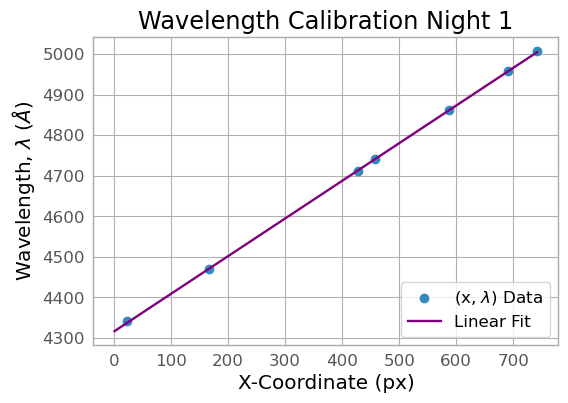

In [14]:
### Derive the wavelength calibration for night 1

### x-coordinates from visual inspection; lambda coordinates from science
xCoordArray = [23, 167, 427, 457, 587, 690.5, 741.5]
lambdaArray = [4341, 4471, 4711, 4740, 4861, 4959, 5007]

# Emission lines
# H_gamma, He_I, [Ar IV], [Ar IV], H_beta, [O_III], [O_III]

### Linear fit
calibPolyfit = np.polyfit(xCoordArray, lambdaArray, 1)
print(calibPolyfit)

### Plot the emission lines and fit
plt.figure(figsize=(6,4))
plt.grid(True)
plt.scatter(xCoordArray,lambdaArray)
plt.plot(np.arange(742)+1,[calibPolyfit[0]*x + calibPolyfit[1] for x in range(0,742)], c = "purple")
plt.title('Wavelength Calibration Night 1')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Wavelength, $\lambda$ ($\AA$)')
plt.legend(["(x, $\lambda$) Data", "Linear Fit"], loc ="lower right")

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final')
plt.savefig('wavelength_calibration_night1.png')

We apply this wavelength calibration to the pixel x-coordinates $x$ to transform them into wavelength values $\lambda$. With $x$=`slitXValues` and $\lambda$=`slitLambaValues`, we have:

$\lambda = 0.927x + 4322$

`slitLambdaValues = 0.927 * slitXValues + 4322`

We plot the Night 1 normalized nebula spectrum as a function of wavelength and can identify several emission lines corresponding to their known literature wavelengths. In particular, we see the [O III] lines at $4959$ and $5007\unicode[serif]{xC5}$, and $H\gamma$ line at $4341\unicode[serif]{xC5}$.

(-2.0, 2.0)

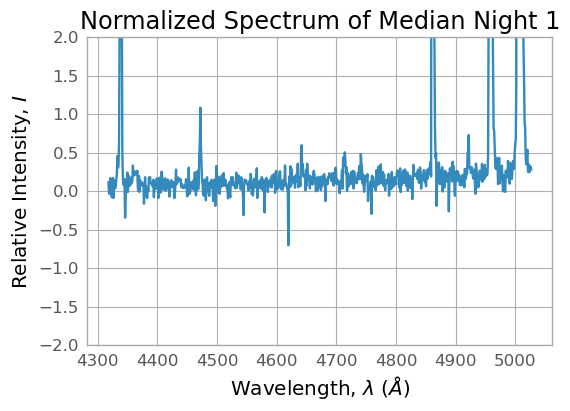

In [15]:
### Plot with now known wavelength values
slitLambdaValues = slitXValues*calibPolyfit[0]+calibPolyfit[1]

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues, science1DNorm)
plt.title('Normalized Spectrum of Median Night 1')
plt.xlabel('Wavelength, $\lambda$ ($\AA$)')
plt.ylabel('Relative Intensity, $I$')
plt.ylim(-2, 2)

### 3.3.2 Night 2

As with Night 1, we determine the wavelength calibration of the data. We identify the x-coordinates of notable emission lines by inspection of the 1D spectrum, and we match them with notable literature emission lines through qualitative inspection of their relative strengths and comparison with literature wavelength positions from the Lab 3 manual [3].

|   X-coordinate (px)   |   Wavelength $(\unicode[serif]{xC5})$  |
|   -----------------   |   -----------------   |
|       19              |           4341        |
|       162.5           |           4471        |
|       423             |           4711        |
|       453             |           4740        |
|       582             |           4861        |
|       686             |           4959        |
|       736.5           |           5007        |

For Night 2, the wavelength $y$ vs pixel x-coordiante $x$ data also appears to follow a linear distribution. Therefore, we use the `np.polyfit()` function to fit a degree-1 polynomial (line) to the data, as with Night 1. We use the fit parameters to generate the fitted function $\hat{y}$:

$\hat{y} = 0.928x + 4321$

where $y$ and $\hat{y}$ are wavelength $(\unicode[serif]{xC5})$. We plot the polynomial fit $\hat{y}(x)$ over the data.

[9.28785455e-01 4.32086556e+03]


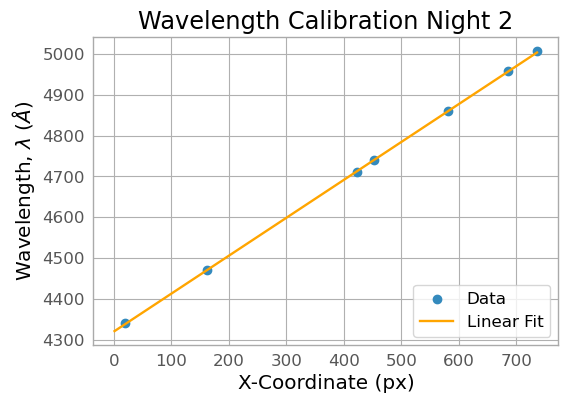

In [16]:
### Derive the wavelength calibration Night 2

### x-coordinates from visual inspection; lambda coordinates from science
xCoordArray2 = [19, 162.5, 423, 453, 582, 686, 736.5]
lambdaArray2 = [4341, 4471, 4711, 4740, 4861, 4959, 5007]

# H_gamma, He_I, [Ar IV], [Ar IV], H_beta, [O_III], [O_III]

### Linear fit
calibPolyfit2 = np.polyfit(xCoordArray2, lambdaArray2, 1)
print(calibPolyfit2)

### Plot the emission lines and fit
plt.figure(figsize=(6,4))
plt.grid(True)
plt.scatter(xCoordArray2,lambdaArray2)
plt.plot(np.arange(736)+1,[calibPolyfit2[0]*x + calibPolyfit2[1] for x in range(0,736)], c = "orange")
plt.title('Wavelength Calibration Night 2')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Wavelength, $\lambda$ ($\AA$)')
plt.legend(["Data", "Linear Fit"], loc ="lower right")

### Save the wavelength calibration diagram
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final')
plt.savefig('wavelength_calibration_night2.png')

Using the polynomial fit function $\hat{y}(x)$, we transform the x-coordinates to wavelengths $\lambda$.

$\lambda = 0.928x + 4321$

We plot our 1D spectrum with respect to wavelength $\lambda$.

(-1.0, 2.0)

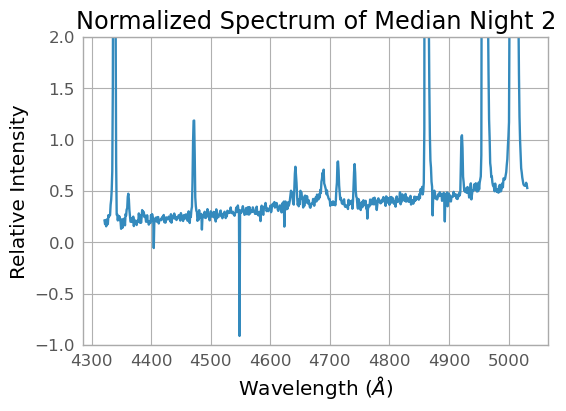

In [17]:
### Plot with now known wavelength values
slitLambdaValues2 = slitXValues*calibPolyfit2[0]+calibPolyfit2[1]

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues2, science1DNormNight2)
plt.title('Normalized Spectrum of Median Night 2')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.ylim(-1, 2)

## 3.4 Spectrophotometric standard star and sensitivity function

It is important to obtain a spectrum of a spectrophotometric standard star, of spectral type A or B. Stars are approximately blackbody emitters, that is, they emit in a continuum of wavelength. 

We use the star Zeta Draconis, of spectral type B6, as our spectrophotometric standard star. By comparing the observed spectrum of our standard star to the theoretical blackbody curve of the star predicted from its temperature, we can determine the global sensitivity variation of the spectrograph.

We construct the master star image by taking the median of all raw star images, with filename `DracZet.0000*.FIT`. As with the nebula images, we slice the data to the rows corresponding to the $50\mu\mathrm{m}$ slit, rows 22-83. We subtract the dark counts from the corresponding star rows and divide by the master flat.

(Calibrated star data) = (Raw star data - Master dark) / (Master flat)

### 3.4.1 Night 1 Master star image

Master Star Created


C:\Users\henry\AppData\Local\Temp\ipykernel_20544\1604060548.py:18: RuntimeWarning: divide by zero encountered in true_divide
  starCalibData = (starSpliceData - darksMedian10MinSplice) / masterFlatSpliceData


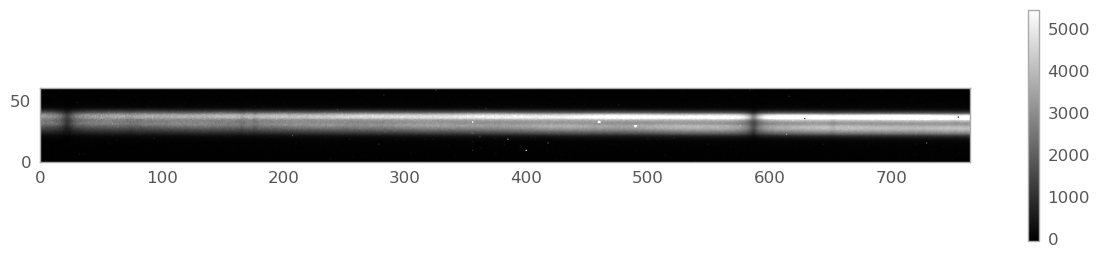

In [18]:
### Now we make master star, starting with night 1 then night 2

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Star')

### Make list of star images
starList = sorted(glob.glob('DracZet.0000*.FIT'))
starData = [fits.open(filename)[0].data for filename in starList]

### Create a median of all star
starMedian = np.median(starData,axis=0)

### Splice star
starSpliceData = starMedian[22:83]
darksMedian10MinSplice = darksMedian10Min[22:83]

### Calibrate star data

starCalibData = (starSpliceData - darksMedian10MinSplice) / masterFlatSpliceData

### Write out masterstar
masterStar = fits.PrimaryHDU(starCalibData)
masterStar.writeto('masterStar.fits', overwrite=True)

print("Master Star Created")

plt.figure(figsize=(15,3))
plt.grid(False)
plt.imshow(starCalibData, cmap='gray', vmin=-38, vmax=5464 ,origin='lower')
plt.colorbar()

### 3.4.2 Night 2 Master star image

Master Star Night 2 Created


C:\Users\henry\AppData\Local\Temp\ipykernel_20544\748263839.py:16: RuntimeWarning: divide by zero encountered in true_divide
  starCalibData2 = (starSpliceData2 - darksMedian40SecSplice2) / masterFlatSpliceDataNight2


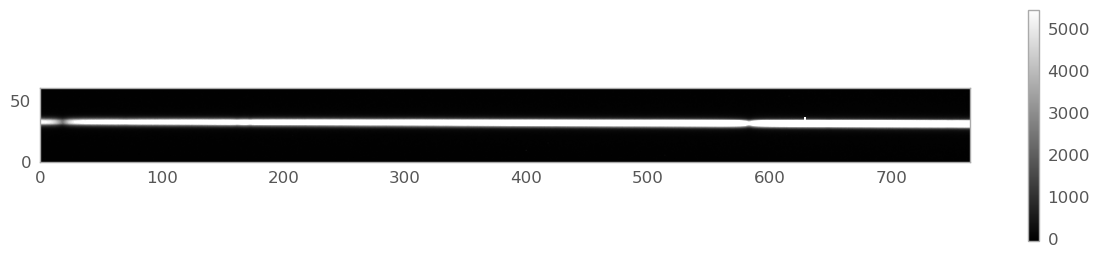

In [19]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Star2')

### Make list of star images
starList2 = sorted(glob.glob('draczet.0000*.FIT'))
starData2 = [fits.open(filename)[0].data for filename in starList2]

### Create a median of all star
starMedian2 = np.median(starData2,axis=0)

### Splice star
starSpliceData2 = starMedian2[22:83]
darksMedian40SecSplice2 = darksMedian40Sec[22:83]

### Calibrate star data

starCalibData2 = (starSpliceData2 - darksMedian40SecSplice2) / masterFlatSpliceDataNight2

### Write out masterstar
masterStar2 = fits.PrimaryHDU(starCalibData2)
masterStar2.writeto('masterStarNight2.fits', overwrite=True)

print("Master Star Night 2 Created")

plt.figure(figsize=(15,3))
plt.grid(False)
plt.imshow(starCalibData2, cmap='gray', vmin=-38, vmax=5464 ,origin='lower')
plt.colorbar()

### 3.4.3 Sky background


After correcting for dark current and flat-field gain, we correct for the sky contribution to the star spectrum. The sky contributes significant light pollution
As with the nebula images, we need to determine the row cutoffs for the star and the sky background. 

We plot statistics on the counts per row, with counts on the x-axis and the y-coordinate of the row on the y-axis. The x-values are shifted to the right by 30 to eliminate the presence of negative count values, as negative x-values would be undefined on a log-scale x-axis and result in the plot failing to generate properly.

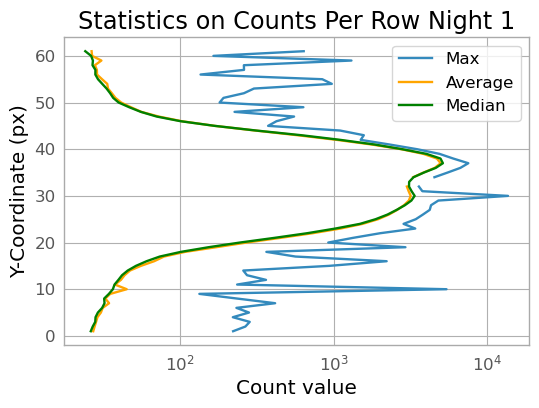

In [20]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Star')

### Determine some statistics on masterstar to see where to cut off sky and not sky, just like the nebula pics
rowTestStar = fits.open('masterStar.fits')

rowTestStarData = rowTestStar[0].data

maxesStar = np.max(rowTestStarData, axis = 1)
averagesStar = np.average(rowTestStarData, axis = 1)
mediansStar = np.median(rowTestStarData, axis = 1)

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(maxesStar+30, slitYValues)
plt.plot(averagesStar+30, slitYValues, c = 'orange')
plt.plot(mediansStar+30, slitYValues, c = 'green')
plt.title('Statistics on Counts Per Row Night 1')
plt.xlabel('Count value')
plt.ylabel('Y-Coordinate (px)')
plt.xscale('log')
plt.legend(["Max", "Average", "Median"], loc ="upper right")

We plot the counts per row for Night 2 and observe a similar trend as with Night 1.

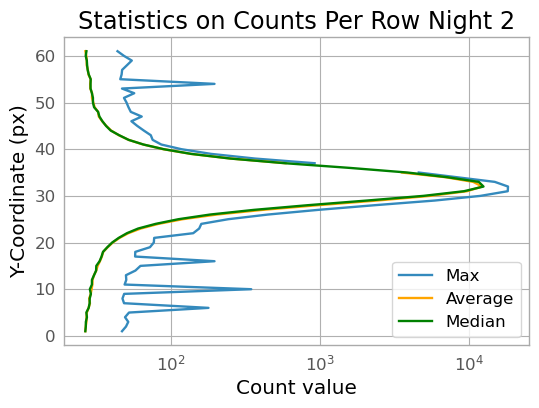

In [21]:
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/SCIENCE!/Star2')

### Determine some statistics on masterstar to see where to cut off sky and not sky
rowTestStar2 = fits.open('masterStarNight2.fits')

rowTestStarData2 = rowTestStar2[0].data

maxesStar2 = np.max(rowTestStarData2, axis = 1)
averagesStar2 = np.average(rowTestStarData2, axis = 1)
mediansStar2 = np.median(rowTestStarData2, axis = 1)

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(maxesStar2+30, slitYValues)
plt.plot(averagesStar2+30, slitYValues, c = 'orange')
plt.plot(mediansStar2+30, slitYValues, c = 'green')
plt.title('Statistics on Counts Per Row Night 2')
plt.xlabel('Count value')
plt.ylabel('Y-Coordinate (px)')
plt.xscale('log')
plt.legend(["Max", "Average", "Median"], loc ="lower right")

From the counts per row plots for both Night 1 and Night 2, we observe more counts in the center of the slit, corresponding to the star. We observe fewer counts on the fringes of the slit, corresponding to the sky background.

We define the star spectrum as between rows 11-51, and we define the sky spectrum as between 51-62. We select these row cutoffs for both Night 1 and Night 2. We define the cut 2D spectra as follows:

Night 1
* Sky background: `starCalibDataSkyCut = starCalibData[51:62]`
* Star spectrum: `starCalibDataNotSkyCut = starCalibData[51:62]`

Night 2
* Sky background: `starCalibDataSkyCut2 = starCalibData2[starSkyLow:starSkyHigh]`
* Star spectrum: `starCalibDataNotSkyCut2 = starCalibData2[starNotSkyLow:starNotSkyHigh]`


In [22]:
### Same as before,select sky cuts for star, make the spectrum
starSkyLow   = 51
starSkyHigh  = 62
starNotSkyLow = 11
starNotSkyHigh = 51

# Night 1 2D spectra
starCalibDataSkyCut = starCalibData[starSkyLow:starSkyHigh]             # Sky background
starCalibDataNotSkyCut = starCalibData[starNotSkyLow:starNotSkyHigh]    # Star spectrum

# Night 2 2D spectra
starCalibDataSkyCut2 = starCalibData2[starSkyLow:starSkyHigh]           # Sky background
starCalibDataNotSkyCut2 = starCalibData2[starNotSkyLow:starNotSkyHigh]  # Star background


We obtain sky-corrected 1D spectra of the star by summing the counts of each column of the 2D star spectrum and subtracting the expected contribution of the sky background across all rows of the star spectrum. We perform the following operation per column of our data:

(Sky-corrected star spectrum) = (Sum of star counts) - (# rows) x (Median of sky background)

We normalize the 1D star spectra by their respective maxima to obtain a relative spectrograph sensitivity vs position distribution. We plot the normalized spectrophotometric standard star spectra for Night 1 and Night 2, without the sensitivity function corrections.

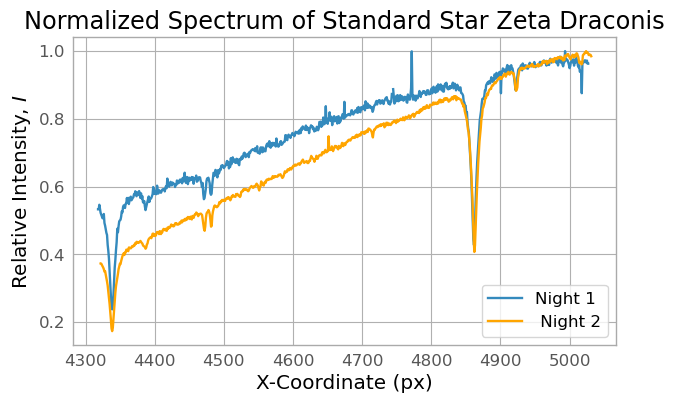

In [23]:
### Subtract the sky background, column-wise
# Night 1
starCalibDataSkyCutMedian = np.median(starCalibDataSkyCut, axis = 0)    # Median of sky background per column
starCalibDataNotSkyCutSum = starCalibDataNotSkyCut.sum(axis = 0)        # Sum of star spectrum per column
# Night 2
starCalibDataSkyCutMedian2 = np.median(starCalibDataSkyCut2, axis = 0)  # Median of sky background per column
starCalibDataNotSkyCutSum2 = starCalibDataNotSkyCut2.sum(axis = 0)      # Sum of star spectrum per column

star1D = starCalibDataNotSkyCutSum - (starNotSkyHigh - starNotSkyLow) * starCalibDataSkyCutMedian
star1D2 = starCalibDataNotSkyCutSum2 - (starNotSkyHigh - starNotSkyLow) * starCalibDataSkyCutMedian2

# Normalize the 1D star spectra
star1DNorm = star1D / np.nanmax(star1D[np.isfinite(star1D)])
star1DNorm2 = star1D2 / np.nanmax(star1D2[np.isfinite(star1D2)])

plt.figure(figsize=(7,4))
plt.grid(True)
plt.plot(slitLambdaValues, star1DNorm)
plt.plot(slitLambdaValues2, star1DNorm2, c = 'orange')
plt.title('Normalized Spectrum of Standard Star Zeta Draconis')
plt.xlabel('X-Coordinate (px)')
plt.ylabel('Relative Intensity, $I$')
plt.legend(["Night 1", " Night 2"], loc ="lower right")

From inspection of both the Night 1 and Night 2 star spectra, we notice several absorption lines in common, notably between 4800-4900 $\unicode[serif]{xC5}$ and 4300-4400 $\unicode[serif]{xC5}$. We see that both spectra increase in relative intensity from the shorter wavelengths to the longer wavelengths in the spectrograph. A possible cause may be that the star differs in focus across the spectrograph. We also notice that the Night 2 spectrum follows a steeper trend than the Night 1 spectrum, which may be due to Star 2 being more poorly focused than Star 1 in the shorter wavelengths, or Star 2 being more clearly focused than Star 1 in the longer wavelengths.

The spectrograph also exhibits varying sensitivity depending on wavelength.

With normalized spectra for Nights 1 and 2 obtained for our spectrophotometric standard star, we compare them to the true intensity of the star. The Planck Law applied to Zeta Draconis yields the true intensity of the star at different wavelengths. We divide the normalized star spectra by the Planck Law intensity curve to correct for the wavelength-dependent varying sensitivity of the spectrograph.

The temperature of Zeta Draconis is 13397 K. The Planck Law gives the intensity (W/m^2) of a radiating source in different wavelengths $\lambda$ and depends on the source temperature $T$.

$I(\lambda, T) = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp(\frac{hc}{\lambda k_B T})-1}$

However, we must convert our wavelengths $\lambda$ from $\unicode[serif]{xC5}$ to $m$. We use the conversion factor $1\unicode[serif]{xC5} = 10^{-10} m$, then plug $\lambda$ into the function. We calculate the true star intensities for Night 1 and Night 2 using the Planck Law and star temperature.

In [24]:
### Calculate planck law true black body for Zeta Draconis with temperature 13397 K
starTemp = 13397

# Physical constants for Planck Law
h = 6.626070e-34    # Planck constant
c = 299792458       # speed of light
k = 1.380649e-23    # Boltzmann constant

# Define Planck Law as a function
def planck(wavelength, temperature):
    a = 2.0 * h * c**2 / wavelength**5
    b = 1.0 / (np.exp((h * c)/(k * temperature * wavelength)) - 1.0)
    specrad = a * b
    return specrad

# Remember to convert angstrom to meter
# True star intensity spectra from Planck Law
trueIntensity = planck(slitLambdaValues / 10**10, starTemp) / np.max(planck(slitLambdaValues / 10**10,starTemp))    # Night 1
trueIntensity2 = planck(slitLambdaValues2 / 10**10, starTemp) / np.max(planck(slitLambdaValues2 / 10**10,starTemp)) # Night 2

We fit a cubic polynomial (degree 3) to the apparent star intensities. The star spectra have absorption lines that we must cut out, as they will significantly skew the polynomial fit to the star intensity curve despite only constituting a small portion of the wavelength space. We include the following wavelength regions over which to perform curve fits:

Night 1 and Night 2
* 4350-4380 $\unicode[serif]{xC5}$
* 4400-4460 $\unicode[serif]{xC5}$
* 4500-4750 $\unicode[serif]{xC5}$
* 4750-4825 $\unicode[serif]{xC5}$
* 4880-4890 $\unicode[serif]{xC5}$
* 4900-4910 $\unicode[serif]{xC5}$
* 4925-5010 $\unicode[serif]{xC5}$

We perform a curve fit on each night's spectrum using the `np.polyfit()` function. We generate the polynomial-fitted $\hat{y}$ values with respect to wavelength $\lambda$ using the parameters of the fit:

* Night 1: $\hat{y} = (-2.234\times 10^{-10}) x^3 + (2.609\times 10^{-6}) x^2 - (9.037\times 10^{-3}) x + (8.869 \times 10^0)$

* Night 2: $\hat{y} = (6.44106298\times 10^{-11}) x^3 - (1.24618324\times 10^{-6}) x^2 + (8.33863905\times 10^{-3}) x - (1.76042211\times 10^1)$

In [25]:
### Identify which index has absorption lines and cut them out in this big list here, also trim infinite values

# Night 1 - indices over which we fit intensity curve
idx = (np.isfinite(slitLambdaValues) & np.isfinite(star1DNorm)) & \
    (((slitLambdaValues > 4350) & (slitLambdaValues < 4380)) | ((slitLambdaValues > 4400) & (slitLambdaValues < 4460)) | \
     ((slitLambdaValues > 4500) & (slitLambdaValues < 4750)) | ((slitLambdaValues > 4750) & (slitLambdaValues < 4825)) | \
     ((slitLambdaValues > 4880) & (slitLambdaValues < 4890)) | ((slitLambdaValues > 4900) & (slitLambdaValues < 4910)) | \
     ((slitLambdaValues > 4925) & (slitLambdaValues < 5010)))

# Night 2 - indices over which we fit intensity curve
idx2 = (np.isfinite(slitLambdaValues2) & np.isfinite(star1DNorm2)) & \
    (((slitLambdaValues2 > 4350) & (slitLambdaValues2 < 4380)) | ((slitLambdaValues2 > 4400) & (slitLambdaValues2 < 4460)) | \
     ((slitLambdaValues2 > 4500) & (slitLambdaValues2 < 4750)) | ((slitLambdaValues2 > 4750) & (slitLambdaValues2 < 4825)) | \
     ((slitLambdaValues2 > 4880) & (slitLambdaValues2 < 4890)) | ((slitLambdaValues2 > 4900) & (slitLambdaValues2 < 4910)) | \
     ((slitLambdaValues2 > 4925) & (slitLambdaValues2 < 5010)))

### Make a cubic fit for this
starPolyFit = np.polyfit(slitLambdaValues[idx], star1DNorm[idx], 3)
print(starPolyFit)

starPolyFit2 = np.polyfit(slitLambdaValues2[idx2], star1DNorm2[idx2], 3)
print(starPolyFit2)

yStarPolyFitValues = [starPolyFit[0]*x**3 + starPolyFit[1]*x**2 + starPolyFit[2]*x + starPolyFit[3] for x in slitLambdaValues]
yStarPolyFitValues2 = [starPolyFit2[0]*x**3 + starPolyFit2[1]*x**2 + starPolyFit2[2]*x + starPolyFit2[3] for x in slitLambdaValues2]



[-5.58815570e-10  7.35513014e-06 -3.14110642e-02  4.39995114e+01]
[-2.73383100e-10  3.52736540e-06 -1.41267616e-02  1.76106068e+01]


We plot the star data with the cubic fit and expected blackbody curve superimposed.

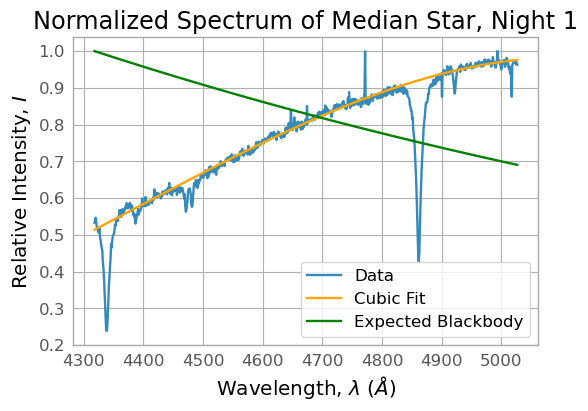

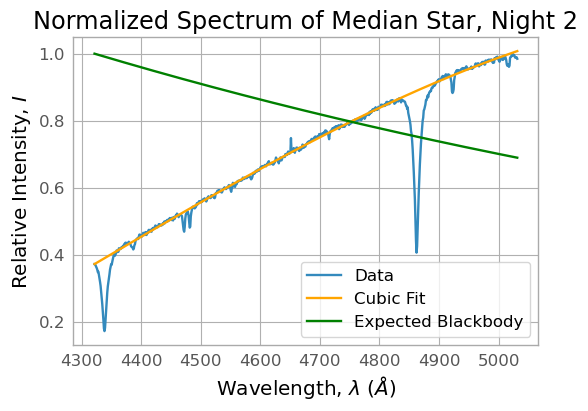

In [26]:
### Night 1
### Plot the star data, cubic fit, and the expected blackbody
plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues, star1DNorm)
plt.plot(slitLambdaValues, yStarPolyFitValues, c = 'orange')
plt.plot(slitLambdaValues, trueIntensity, c = 'green')
plt.title('Normalized Spectrum of Median Star, Night 1')
plt.xlabel('Wavelength, $\lambda$ ($\AA$)')
plt.ylabel('Relative Intensity, $I$')
plt.legend(["Data", "Cubic Fit", "Expected Blackbody"], loc ="lower right")

### Night 2
### Plot the star data, cubic fit, and the expected blackbody
plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues2, star1DNorm2)
plt.plot(slitLambdaValues2, yStarPolyFitValues2, c = 'orange')
plt.plot(slitLambdaValues2, trueIntensity2, c = 'green')
plt.title('Normalized Spectrum of Median Star, Night 2')
plt.xlabel('Wavelength, $\lambda$ ($\AA$)')
plt.ylabel('Relative Intensity, $I$')
plt.legend(["Data", "Cubic Fit", "Expected Blackbody"], loc ="lower right")

The cubic function fits the star intensity data closely. The apparent star intensity follows the opposite trend over wavelength space with respect to the expected blackbody intensity. While we would expect the star's intensity to decrease with respect to wavelength in the 4300-5000 $\unicode[serif]{xC5}$ range given its temperature of 13397 K, we instead see the star's intensity increasing with respect to wavelength. This is due to the varying sensitivity of the spectrograph, as explained in the next section.

### 3.4.4 Spectrograph sensitivity function

We calculate the 1D spectrograph sensitivity function from the reference star Zeta Draconis, for both Night 1 and Night 2. The sensitivity function is obtained by dividing the apparent star intensity curve fit by the true intensity obtained from Planck's Law.

(Sensitivity function) = (Apparent star intensity curve fit) / (True intensity from Planck Law)

We plot the sensitivity functions for Night 1 and Night 2.

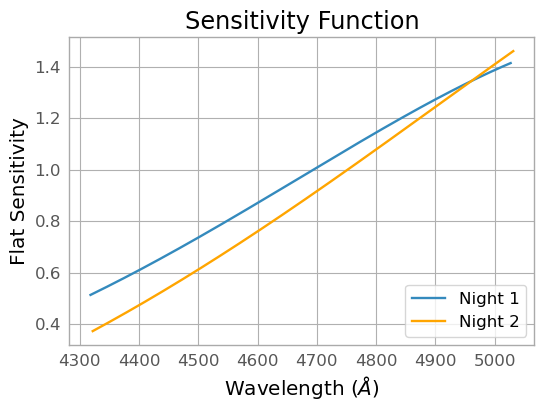

In [27]:
### Sensitivity function created
sensitivity1D = yStarPolyFitValues / trueIntensity
sensitivity1D2 = yStarPolyFitValues2 / trueIntensity2

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues, sensitivity1D)
plt.plot(slitLambdaValues2, sensitivity1D2, c = 'orange')
plt.title('Sensitivity Function')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Flat Sensitivity')
plt.legend(["Night 1", "Night 2"], loc ="lower right")

The sensitivity function shows that the spectrograph is more sensitive in longer wavelengths than in shorter wavelengths. With the apparent star intensity increasing with wavelength but the actual star intensity (determined through Planck's Law) decreasing with wavelength, this result is expected. However, the sensitivity function for Night 2 varies more strongly than Night 1. This may be because the star exhibits greater wavelength-dependent variation in focus on Night 2 than on Night 1.

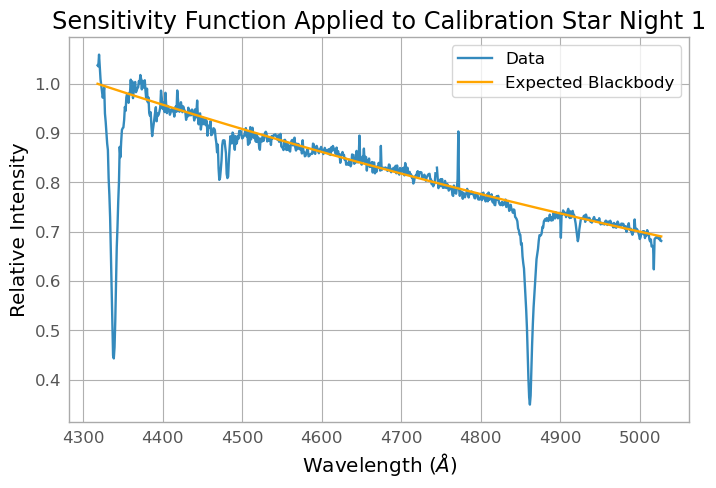

In [28]:
### See what our star looks like for fun
trueStar = star1DNorm / sensitivity1D

plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(slitLambdaValues, trueStar)
plt.plot(slitLambdaValues, trueIntensity, c = 'orange')
plt.title('Sensitivity Function Applied to Calibration Star Night 1')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.legend(["Data","Expected Blackbody"], loc ="upper right")

## 3.5 Sensitivity function applied to nebula spectra and nebula error spectra

With our spectrograph sensitivity functions determined from the Zeta Draconis spectra and blackbody curves, we calibrate the 1D NGC 6543 spectra from Night 1 and Night 2. We perform the calibration as follows:

* (Calibrated nebula spectrum) = (Uncalibrated nebula spectrum) / (Sensitivity Function)

We normalize the calibrated 1D spectrum by dividing by its maximum and multiplying by a scale factor of 250 to yield convenient spectral line intensities.

* (Normalized nebula spectrum) = (Calibrated nebula spectrum) / max(Calibrated nebula spectrum) * 250

We also need a calibrated and normalized error spectrum to determine the uncertainty in each data point. In order to perform data analysis, we need to propagate uncertainty from the data to the estimated emission line intensities and the estimated temperature and density of the nebula. We calibrate the error spectrum as follows:

* (Calibrated error spectrum) = (Uncalibrateed error spectrum) / (Sensitivity function)

We normalize the error spectra by dividing by the maximum of the calibrated nebula spectrum as before, and by multiplying by the same scale factor as our nebula spectra:

* (Normalized error spectrum) = (Calibrated error spectrum) / max(Calibrated nebula spectrum) * 250


### 3.5.1 Night 1

We calibrate the spectrum and error spectrum. We plot the calibrated, normalized nebula spectrum with a log y-axis. 

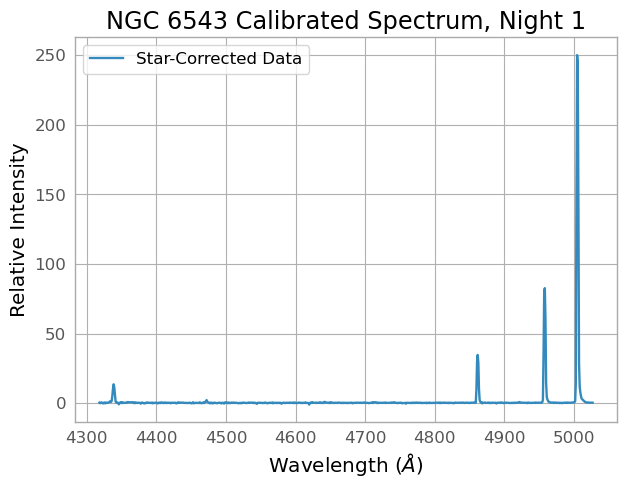

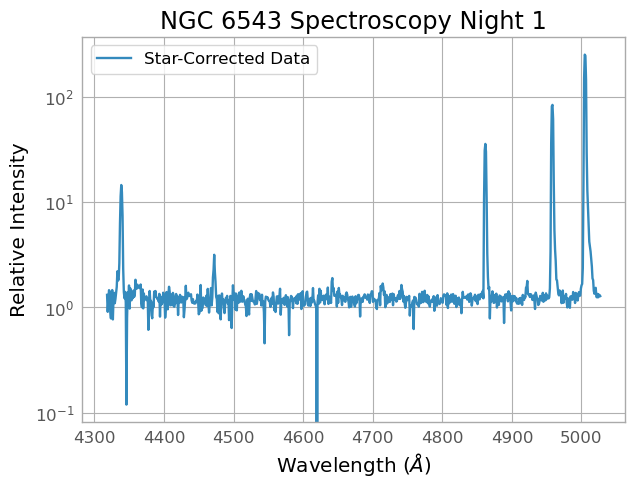

In [29]:
### Calibrate our science data with the sensitivity function, then normalize it.
finalScienceNight1 = (science1D / sensitivity1D) / np.nanmax(science1D / sensitivity1D) * 250

### Calibrated and normalized uncertainty
finalScienceNight1Err = (science1DErr / sensitivity1D) / np.nanmax(science1D) * 250

# Night 1 final spectrum plot

plt.figure(figsize=(7,5))
plt.grid(True)
plt.plot(slitLambdaValues, finalScienceNight1, label='Star-Corrected Data')
# plt.plot(slitLambdaValues, science1DNorm, c = 'orange')
plt.fill_between(slitLambdaValues, finalScienceNight1 - finalScienceNight1Err, finalScienceNight1 + finalScienceNight1Err)
plt.title('NGC 6543 Calibrated Spectrum, Night 1')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
# plt.xlim(5000,5010)
# plt.ylim(248,252)
plt.legend(loc ="upper left")

# Same plot, but in log scale and add 2 to all intensity values to eliminate negative intensity values being log-functioned
plt.figure(figsize=(7,5))
plt.grid(True)
plt.plot(slitLambdaValues, finalScienceNight1+1, label='Star-Corrected Data')
# plt.plot(slitLambdaValues, science1DNorm+1, c = 'orange')
plt.title('NGC 6543 Spectroscopy Night 1')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.legend(loc ="upper left")
plt.yscale('log')


In the full-size plots, we clearly see the [O III] lines at 4959 and 5007 $\unicode[serif]{xC5}$, as well as the $H\gamma$ $4341 \unicode[serif]{xC5}$ line and $H\beta$ $4861 \unicode[serif]{xC5}$ line. We determine these lines by consulting with the Nebula Spectroscopy Lab Manual for Lab 3 [3]. We also see an emission line at approximately $4450 \unicode[serif]{xC5}$ to $4500 \unicode[serif]{xC5}$. We are not certain of the identity of this emission line.

On the other hand, we do not see [O III] 4363 line at this scale. 


### 3.5.2 Night 2 calibration

As with the Night 1 nebula spectrum and nebula error spectrum, we calibrate over the sensitivity function for Night 2 and normalize the resulting calibrated spectrum over its maximum, using the same scale factor of 250 to yield convenient intensity values of the emission lines. We plot the calibrated and normalized spectrum for NGC 6543 on Night 2.

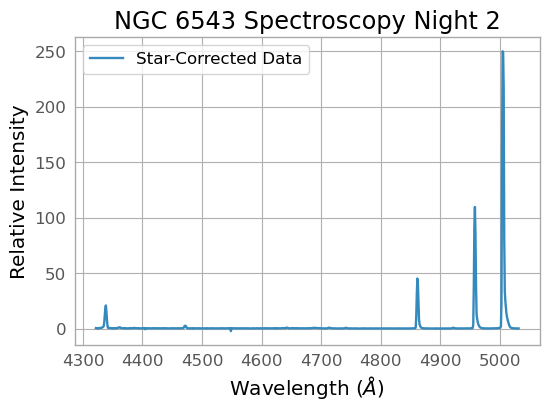

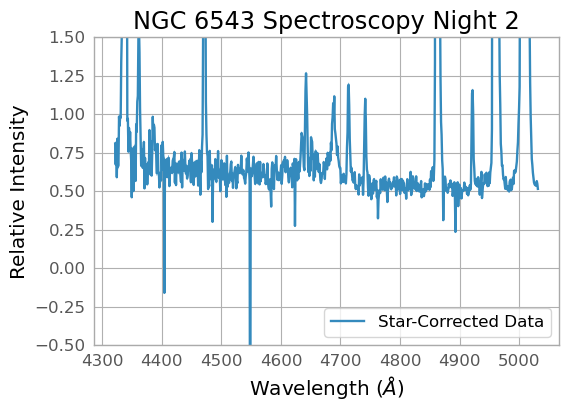

In [30]:
### Calibrate our science data with the sensitivity function night 2
finalScienceNight2 = (science1DNight2 / sensitivity1D2) / np.nanmax(science1DNight2 / sensitivity1D2) * 250

### Normalized Uncertainty
finalScienceNight2Err = science1DErrNight2 / sensitivity1D2 / np.nanmax(science1DNight2) * 250

# print(science1DErr)
# print(science1DErrNight2)

# Plot the Night 2 final nebula spectrum
plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues2, finalScienceNight2, label='Star-Corrected Data')
# plt.plot(slitLambdaValues2, science1DNormNight2, c = 'orange')
plt.fill_between(slitLambdaValues2, finalScienceNight2 - finalScienceNight2Err, finalScienceNight2 + finalScienceNight2Err)
plt.title('NGC 6543 Spectroscopy Night 2')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.legend(loc ="upper left");

# Plot only a certain interval of the data
plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues2, finalScienceNight2, label='Star-Corrected Data')
# plt.plot(slitLambdaValues2, science1DNormNight2, c = 'orange')
plt.fill_between(slitLambdaValues2, finalScienceNight2 - finalScienceNight2Err, finalScienceNight2 + finalScienceNight2Err)
plt.title('NGC 6543 Spectroscopy Night 2')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.ylim(-0.5,1.5)
plt.legend(loc ="lower right");


By inspection of the Night 2 spectrum plot, we observe the following strong emission lines:
* $H\gamma$ $4341 \unicode[serif]{xC5}$
* $H\beta$ $4861 \unicode[serif]{xC5}$

The strongest emission lines of [O III] at 4959 and 5007 $\unicode[serif]{xC5}$ are effectively saturated in the Night 2 spectrum due to the greater number of counts received by the spectroscopy CCD on Night 2. 

In order to view the weaker emission lines, we inspect a small interval of the graph, $-1 < y < 1$. We notice the following weak emission lines, including our desired [Ar IV] lines.
* $[Ar IV]$ $4711 \unicode[serif]{xC5}$

In the calibrated spectrum for Night 2, the [Ar IV] lines at 4711 and 4740 $\unicode[serif]{xC5}$ are apparent, though they are small in comparison to the spectral baseline.

(-2.0, 2.0)

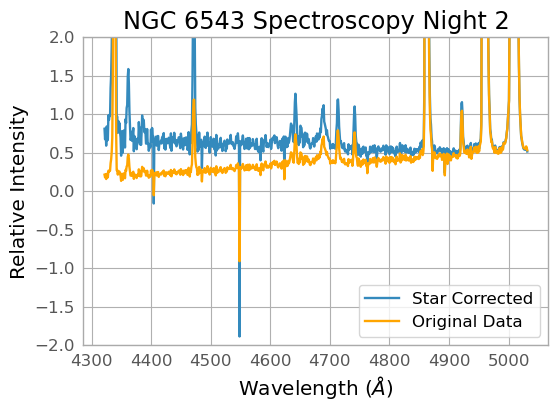

In [31]:
### Plot the original vs calibrated spectra
plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues2, finalScienceNight2)
plt.plot(slitLambdaValues2, science1DNormNight2, c = 'orange')
plt.title('NGC 6543 Spectroscopy Night 2')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.legend(["Star Corrected","Original Data"], loc ="lower right")
plt.ylim(-2, 2)

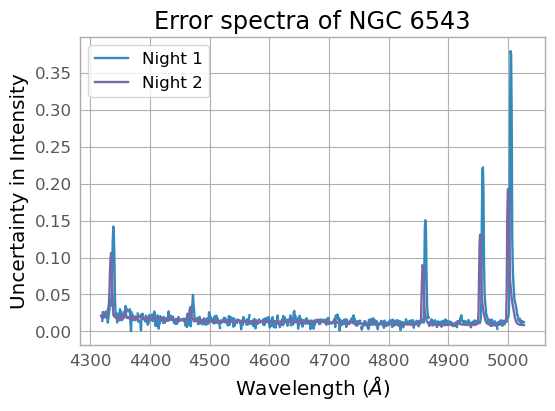

In [32]:
### Plot the Error spectra
plt.figure(figsize=(6,4))
plt.plot(slitLambdaValues, finalScienceNight1Err, label='Night 1')   # Error spectrum plot
plt.plot(slitLambdaValues, finalScienceNight2Err, label='Night 2')   # Error spectrum plot
plt.title('Error spectra of NGC 6543')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Uncertainty in Intensity')
plt.legend()

# 4 Data Analysis

In this section we perform analysis on the reduced spectra for NGC 6543 on Night 1 and Night 2. The intensities of emission lines are given in arbitrary units. Since the desired quantities 

* [O III]: $ ( F[4959] + F[5007] ) / F[4363] $

* [Ar IV]: $ F[4740] / F[4711] $

are ratios of flux, any units would cancel out and hence it is sufficient to use the arbitrary units for intensity determined from the spectral plots.

We determine the intensity of a given emission line by fitting a Gaussian function locally to the emission line. The area under the curve is an estimate of the emission line intensity. However, the curve fitting function propagates error from the local data points and introduces additional fit error, which is reflected in the uncertainty of the emission line intensity.

Using the estimated emission line intensitities, we calculate the relevant [O III] and [Ar IV] ratios and their uncertainties. Using the flux ratios, we calculate the nebula temperature, density, and their uncertainties. 

## 4.1 Identifying emission lines and their strengths

From the plots of the Night 1 and Night 2 spectra of NGC 6543, our objective is to determine the intensities of the following emission lines:

Night 1
* [O III] 4959 $\unicode[serif]{xC5}$
* [O III] 5007 $\unicode[serif]{xC5}$

Night 2
* [O III] 4363 $\unicode[serif]{xC5}$
* [O III] 4959 $\unicode[serif]{xC5}$
* [Ar IV] 4711 $\unicode[serif]{xC5}$
* [Ar IV] 4740 $\unicode[serif]{xC5}$

We obtained the additional emission lines by comparison with [diagram]. (you already talk about this in the previous section)

We determine the intensity of each emission line by running the `scipy.curvefit` function to fit a Gaussian function to the data in the neighborhood of the emission line wavelength $\lambda$. The Gaussian function has the form

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $H$ is the vertical offset of the Gaussian, $A$ is the area under the Gaussian curve above the offset $H$, $\sigma$ is the standard deviation, and $\mu$ is the mean. The wavelengths are passed as $x$, and the predicted intensity values at each wavelength are given as $\hat{y}$.

The Gaussian fit function is a variation of the standard normal Gaussian distribution:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The standard normal Gaussian distribution has an integral of 1; therefore, the parameter $A$ can be thought of as a scale factor for the area under the fitted Gaussian curve, or the emission line intensity. Since $A=1$ corresponds to an area of $1$, this means that: 

$A = $ (emission line intensity)

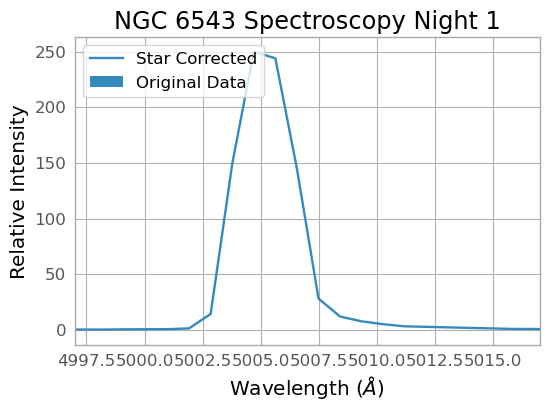

In [33]:
### Night 1
### Emission line strengths, normalized to 250 height

# Night 1 O[III] lines
# print(finalScienceNight1)

### [O III] 5007 angstrom

# gaussian fit around the [O III] 5007 angstrom line

plt.figure(figsize=(6,4))
plt.grid(True)
plt.plot(slitLambdaValues, finalScienceNight1)
# plt.plot(slitLambdaValues, science1DNorm, c = 'orange')
plt.fill_between(slitLambdaValues, finalScienceNight1 - finalScienceNight1Err, finalScienceNight1 + finalScienceNight1Err)
plt.title('NGC 6543 Spectroscopy Night 1')
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Intensity')
plt.xlim(4997,5017)
# plt.ylim(248,252)
plt.legend(["Star Corrected","Original Data"], loc ="upper left")

### Night 1: [O III] $5007 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $5007 \unicode[serif]{xC5}$. This neighborhood occupies approximately 4992 to 5022 $\unicode[serif]{xC5}$. We pass in the Night 1 nebula spectrum with the wavelengths `oxygenLambdaValues5007` as the $x$ data, the nebula intensity values `oxygenIntensityValues5007` as the $y$ data, and the corresponding uncertainty spectrum values `oxygenUncertValues5007` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the following parameters: $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   200             |
|   $\mu$       |   5008            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, oxygenLambdaValues5007, oxygenIntensityValues5007, p0=guess, sigma=oxygenUncertValues5007)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.398              |
|   A           |   755.716            |
|   $\mu$       |   5009.080           |
|   $\sigma$    |   1.058              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [O III] $5007 \unicode[serif]{xC5}$ line flux for Night 1:

$$ F[5007]_1 = 755.716 \pm 34.271$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 81174.875$.

# of data points: 32
H: 0.4766951923035284
A: 755.9484128103652
A uncert: 33.84119110621706
mu: 5005.2413415383135
sigma: 1.0577642918199872
Intensity: 755.9484128103652
Intensity uncertainty: 33.84119110621706
83.07913119202838
chi-square: 78962.40311008733


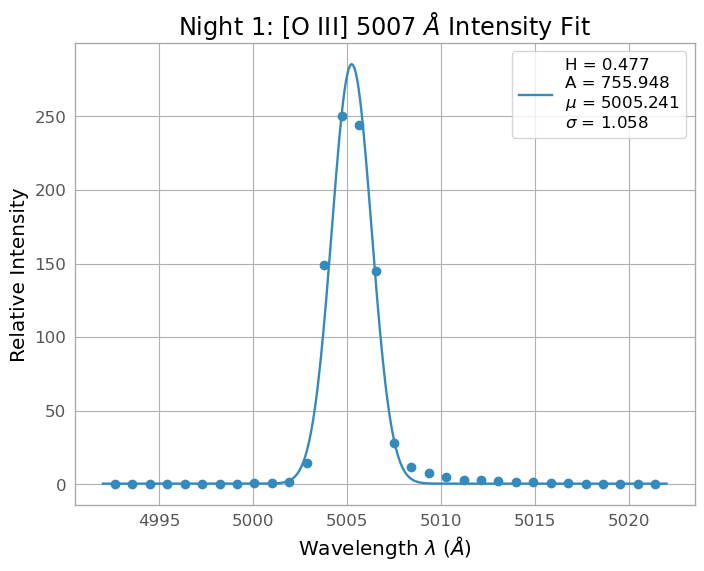

In [34]:
### Gaussian function to fit to emission line curves
### A becomes the area under the curve
def Gauss(x, H, A, mu, sigma):
    y = H + A/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
    return y
### Full width at half maximum (FWHM) of Gaussian with stdev sigma
def lowHM(mu, sigma):
    return mu - sigma * np.sqrt(2 * np.log(2))
def highHM(mu, sigma):
    return mu + sigma * np.sqrt(2 * np.log(2))
def FWHM(sigma):
    return 2 * sigma * np.sqrt(2 * np.log(2))
    
### [O III] 5007 Angstrom

# Slice the wavelengths
oxygenLambdaValues5007 = []
oxygenIntensityValues5007 = []
oxygenUncertValues5007 = []

for index, x in enumerate(slitLambdaValues):
    if (x > 5007-15) and (x < 5007+15):
        oxygenLambdaValues5007.append(x)
        oxygenIntensityValues5007.append(finalScienceNight1[index])
        oxygenUncertValues5007.append(finalScienceNight1Err[index])
oxygenLambdaValues5007 = np.array(oxygenLambdaValues5007)
oxygenIntensityValues5007 = np.array(oxygenIntensityValues5007)
oxygenUncertValues5007 = np.array(oxygenUncertValues5007)

# How many data points did we use?
print('# of data points:', len(oxygenLambdaValues5007))

# Curve fit
guess = [1, 200, 5008, 1]
parameters, covariance = curve_fit(Gauss, oxygenLambdaValues5007, oxygenIntensityValues5007, p0=guess, sigma=oxygenUncertValues5007)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss5007 = np.linspace(5007-15,5007+15, 400)
oxygen5007Gaussian = Gauss(lambdaGauss5007, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss5007, oxygen5007Gaussian, label=labelString)
plt.scatter(oxygenLambdaValues5007, oxygenIntensityValues5007)
plt.title('Night 1: [O III] 5007 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night1_oxygen5007_gaussfit.png')

# Calculate the intensity of the emission line and its uncertainty
oxygen5007IntensityNight1 = fit_A
print('Intensity:', oxygen5007IntensityNight1)
oxygen5007UncertNight1 = uncert_A
print('Intensity uncertainty:', oxygen5007UncertNight1)

# Calculate the chi-square of the fit (the uncertainty on the fit)
oxygenIntensityModel5007 = Gauss(oxygenLambdaValues5007, fit_H, fit_A, fit_mu, fit_sigma)
print(((oxygenIntensityValues5007[0] - oxygenIntensityModel5007[0])/oxygenUncertValues5007[0])**2)
chisqOxygen5007Night1 = np.sum( ((oxygenIntensityValues5007 - oxygenIntensityModel5007) / oxygenUncertValues5007)**2 )
print("chi-square:", chisqOxygen5007Night1)

### Night 1: [O III] $4959 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $4959 \unicode[serif]{xC5}$, within approximately $10-15 \unicode[serif]{xC5}$. We pass in the Night 1 nebula spectrum with the wavelengths `oxygenLambdaValues4959` as the $x$ data, the nebula intensity values `oxygenIntensityValues4959` as the $y$ data, and the corresponding uncertainty spectrum values `oxygenUncertValues4959` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the following parameters: $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   80              |
|   $\mu$       |   4961            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4959, oxygenIntensityValues4959, p0=guess, sigma=oxygenUncertValues4959)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.299              |
|   A           |   250.691            |
|   $\mu$       |   4962.032           |
|   $\sigma$    |   1.058              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [O III] $4959 \unicode[serif]{xC5}$ line flux for Night 1:

$$ F[4959]_1 = 250.691 \pm 11.216$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 20546.232$.

H: 0.30270664248335977
A: 250.38001256042133
A uncert: 11.28863943083025
mu: 4958.142163396053
sigma: 1.0589174095556442
Intensity: 250.38001256042133
Intensity uncertainty: 11.28863943083025
chi-square: 20861.179340383525


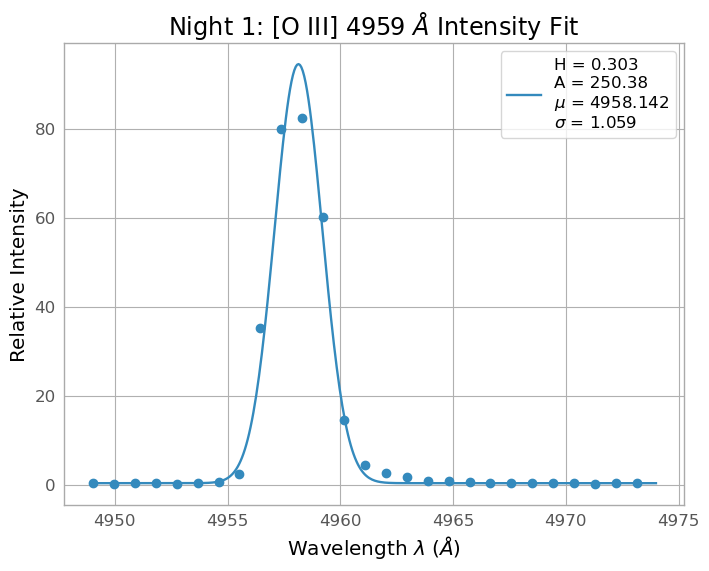

In [35]:
### [O III] 4959 angstrom

# Slice the wavelengths
oxygenLambdaValues4959Night1 = []
oxygenIntensityValues4959Night1 = []
oxygenUncertValues4959Night1 = []

for index, x in enumerate(slitLambdaValues):
    if (x > 4959-10) and (x < 4959+15):
        oxygenLambdaValues4959Night1.append(x)
        oxygenIntensityValues4959Night1.append(finalScienceNight1[index])
        oxygenUncertValues4959Night1.append(finalScienceNight1Err[index])
oxygenLambdaValues4959Night1 = np.array(oxygenLambdaValues4959Night1)
oxygenIntensityValues4959Night1 = np.array(oxygenIntensityValues4959Night1)
oxygenUncertValues4959Night1 = np.array(oxygenUncertValues4959Night1)

# Curve fit
guess = [1, 80, 4961, 1]
parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4959Night1, oxygenIntensityValues4959Night1, p0=guess, sigma=oxygenUncertValues4959Night1)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss4959 = np.linspace(4959-10,4959+15, 400)
oxygen4959GaussianNight1 = Gauss(lambdaGauss4959, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss4959, oxygen4959GaussianNight1, label=labelString)
plt.scatter(oxygenLambdaValues4959Night1, oxygenIntensityValues4959Night1)
plt.title('Night 1: [O III] 4959 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night1_oxygen4959_gaussfit.png')

# Calculate the intensity of the emission line
oxygen4959IntensityNight1 = fit_A
print('Intensity:', oxygen4959IntensityNight1)
oxygen4959UncertNight1 = uncert_A
print('Intensity uncertainty:', oxygen4959UncertNight1)

# Calculate the chi-square of the fit (the uncertainty on the fit)
oxygenIntensityModel4959Night1 = Gauss(oxygenLambdaValues4959Night1, fit_H, fit_A, fit_mu, fit_sigma)
chisqOxygen4959Night1 = np.sum( ((oxygenIntensityValues4959Night1 - oxygenIntensityModel4959Night1) / oxygenUncertValues4959Night1)**2 )
print("chi-square:", chisqOxygen4959Night1)

### Night 2: [O III] $4959 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $4959 \unicode[serif]{xC5}$, within approximately $10-15 \unicode[serif]{xC5}$. We pass in the Night 2 nebula spectrum with the wavelengths `oxygenLambdaValues4959Night2` as the $x$ data, the nebula intensity values `oxygenIntensityValues4959Night2` as the $y$ data, and the corresponding uncertainty spectrum values `oxygenUncertValues4959Night2` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the parameters $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   100             |
|   $\mu$       |   4961            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4959Night2, oxygenIntensityValues4959Night2, p0=guess, sigma=oxygenUncertValues4959Night2)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.825              |
|   A           |   348.471            |
|   $\mu$       |   4962.010           |
|   $\sigma$    |   1.208              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [O III] $4959 \unicode[serif]{xC5}$ line flux for Night 2:

$$ F[4959]_2 = 348.471 \pm 18.927$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 157637.529$.

H: 0.8552224856195374
A: 347.73933912792364
A uncert: 18.792396774552444
mu: 4958.113161812017
sigma: 1.2083284715561917
Intensity: 347.73933912792364
Intensity uncertainty: 18.792396774552444
chi-square: 155694.8654112427


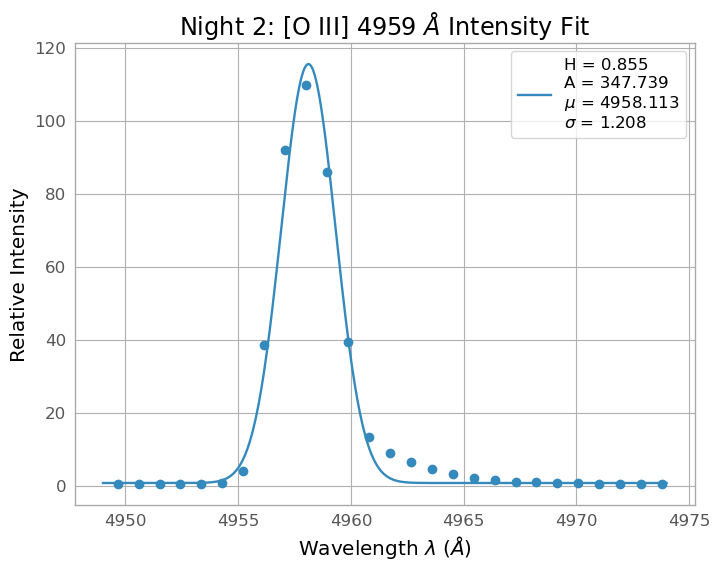

In [36]:
### Night 2 gaussian fit

### [O III] 4959 angstrom

# Slice the wavelengths
oxygenLambdaValues4959Night2 = []
oxygenIntensityValues4959Night2 = []
oxygenUncertValues4959Night2 = []

for index, x in enumerate(slitLambdaValues2):
    if (x > 4959-10) and (x < 4959+15):
        oxygenLambdaValues4959Night2.append(x)
        oxygenIntensityValues4959Night2.append(finalScienceNight2[index])
        oxygenUncertValues4959Night2.append(finalScienceNight2Err[index])
oxygenLambdaValues4959Night2 = np.array(oxygenLambdaValues4959Night2)
oxygenIntensityValues4959Night2 = np.array(oxygenIntensityValues4959Night2)
oxygenUncertValues4959Night2 = np.array(oxygenUncertValues4959Night2)

# Curve fit
guess = [1, 100, 4961, 1]
parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4959Night2, oxygenIntensityValues4959Night2, p0=guess, sigma=oxygenUncertValues4959Night2)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss4959Night2 = np.linspace(4959-10,4959+15, 400)
oxygen4959GaussianNight2 = Gauss(lambdaGauss4959Night2, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss4959Night2, oxygen4959GaussianNight2, label=labelString)
plt.scatter(oxygenLambdaValues4959Night2, oxygenIntensityValues4959Night2)
plt.title('Night 2: [O III] 4959 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night2_oxygen4959_gaussfit.png')

# Calculate the intensity of the emission line
oxygen4959IntensityNight2 = fit_A
print('Intensity:', oxygen4959IntensityNight2)
oxygen4959UncertNight2 = uncert_A
print('Intensity uncertainty:', oxygen4959UncertNight2)

# Calculate the chi-square of the fit (the uncertainty on the fit)
oxygenIntensityModel4959Night2 = Gauss(oxygenLambdaValues4959Night2, fit_H, fit_A, fit_mu, fit_sigma)
chisqOxygen4959Night2 = np.sum( ((oxygenIntensityValues4959Night2 - oxygenIntensityModel4959Night2) / oxygenUncertValues4959Night2)**2 )
print("chi-square:", chisqOxygen4959Night2)

### Night 2: [O III] $4363 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $4363 \unicode[serif]{xC5}$, within approximately $15 \unicode[serif]{xC5}$. We pass in the Night 2 nebula spectrum with the wavelengths `oxygenLambdaValues4363Night2` as the $x$ data, the nebula intensity values `oxygenIntensityValues4363Night2` as the $y$ data, and the corresponding uncertainty spectrum values `oxygenUncertValues4363Night2` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the parameters $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   1               |
|   $\mu$       |   4363            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4363Night2, oxygenIntensityValues4363Night2, p0=guess, sigma=oxygenUncertValues4363Night2)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.702              |
|   A           |   3.734              |
|   $\mu$       |   4365.904           |
|   $\sigma$    |   1.739              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [O III] $4363 \unicode[serif]{xC5}$ line flux for Night 2:

$$ F[4363]_2 = 3.734 \pm 0.508$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 1145.174$.

H: 0.6492653075694509
A: 4.106598388019814
A uncert: 0.4669744757323729
mu: 4361.334821383559
sigma: 1.9090138228535531
Intensity: 4.106598388019814
Intensity uncertainty: 0.4669744757323729
chi-square: 920.0639640657369


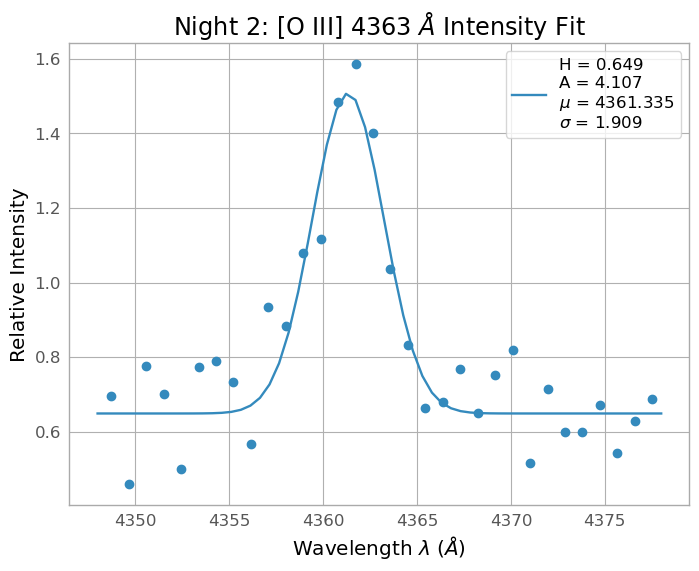

In [37]:
### [O III] 4363 angstrom

# Slice the wavelengths
oxygenLambdaValues4363Night2 = []
oxygenIntensityValues4363Night2 = []
oxygenUncertValues4363Night2 = []

for index, x in enumerate(slitLambdaValues2):
    if (x > 4363-15) and (x < 4363+15):
        oxygenLambdaValues4363Night2.append(x)
        oxygenIntensityValues4363Night2.append(finalScienceNight2[index])
        oxygenUncertValues4363Night2.append(finalScienceNight2Err[index])
oxygenLambdaValues4363Night2 = np.array(oxygenLambdaValues4363Night2)
oxygenIntensityValues4363Night2 = np.array(oxygenIntensityValues4363Night2)
oxygenUncertValues4363Night2 = np.array(oxygenUncertValues4363Night2)

# Curve fit
guess = [1, 1, 4363, 1]
parameters, covariance = curve_fit(Gauss, oxygenLambdaValues4363Night2, oxygenIntensityValues4363Night2, p0=guess, sigma=oxygenUncertValues4363Night2)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss4363Night2 = np.linspace(4363-15,4363+15, 60)
oxygen4363GaussianNight2 = Gauss(lambdaGauss4363Night2, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss4363Night2, oxygen4363GaussianNight2, label=labelString)
plt.scatter(oxygenLambdaValues4363Night2, oxygenIntensityValues4363Night2)
plt.title('Night 2: [O III] 4363 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night2_oxygen4363_gaussfit.png')

# Calculate the intensity of the emission line and its uncertainty
oxygen4363IntensityNight2 = fit_A
print('Intensity:', oxygen4363IntensityNight2)
oxygen4363UncertNight2 = uncert_A
print('Intensity uncertainty:', oxygen4363UncertNight2)

# Calculate the chi-square of the fit (the uncertainty on the fit)
oxygenIntensityModel4363Night2 = Gauss(oxygenLambdaValues4363Night2, fit_H, fit_A, fit_mu, fit_sigma)
chisqOxygen4363Night2 = np.sum( ((oxygenIntensityValues4363Night2 - oxygenIntensityModel4363Night2) / oxygenUncertValues4363Night2)**2 )
print("chi-square:", chisqOxygen4363Night2)

### Night 2: [Ar IV] $4740 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $4740 \unicode[serif]{xC5}$, within approximately $15-25 \unicode[serif]{xC5}$. We pass in the Night 2 nebula spectrum with the wavelengths `argonLambdaValues4740Night2` as the $x$ data, the nebula intensity values `argonIntensityValues4740Night2` as the $y$ data, and the corresponding uncertainty spectrum values `argonUncertValues4740Night2` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the parameters $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   5               |
|   $\mu$       |   4745            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, argonLambdaValues4740Night2, argonIntensityValues4740Night2, p0=guess, sigma=argonUncertValues4740Night2)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.541              |
|   A           |   1.879              |
|   $\mu$       |   4745.713           |
|   $\sigma$    |   1.329              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [Ar IV] $4740 \unicode[serif]{xC5}$ line flux:

$$ F[4740] = 1.879 \pm 0.146$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 624.505$.

H: 0.5167249065080689
A: 2.0517900737871604
A uncert: 0.2123958366465376
mu: 4741.600615690655
sigma: 1.4228741214855265
Intensity: 2.0517900737871604
Intensity uncertainty: 0.2123958366465376
chi-square: 1268.8616046696966


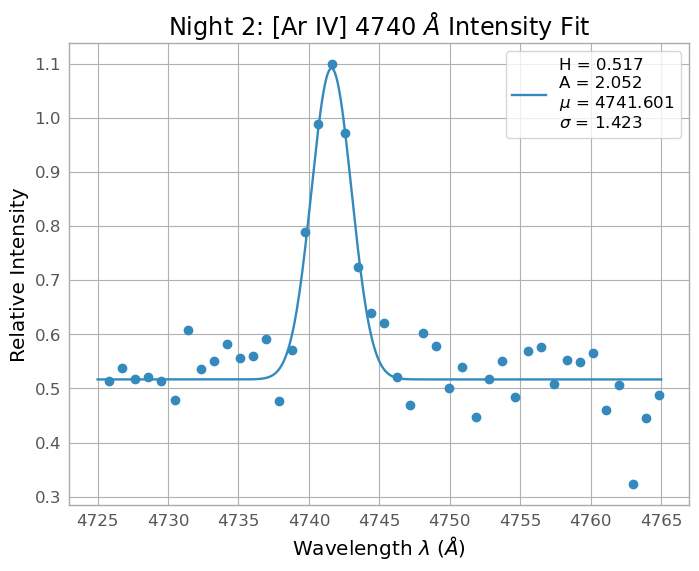

In [38]:
### Fit gaussian to argon lines

### [Ar IV] 4740 angstrom

# Slice the wavelengths
argonLambdaValues4740Night2 = []
argonIntensityValues4740Night2 = []
argonUncertValues4740Night2 = []

for index, x in enumerate(slitLambdaValues2):
    if (x > 4740-15) and (x < 4740+25):
        argonLambdaValues4740Night2.append(x)
        argonIntensityValues4740Night2.append(finalScienceNight2[index])
        argonUncertValues4740Night2.append(finalScienceNight2Err[index])
argonLambdaValues4740Night2 = np.array(argonLambdaValues4740Night2)
argonIntensityValues4740Night2 = np.array(argonIntensityValues4740Night2)
argonUncertValues4740Night2 = np.array(argonUncertValues4740Night2)

# Curve fit
guess = [1, 5, 4745, 1]
parameters, covariance = curve_fit(Gauss, argonLambdaValues4740Night2, argonIntensityValues4740Night2, p0=guess, sigma=argonUncertValues4740Night2)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss4740Night2 = np.linspace(4740-15,4740+25, 400)
argon4740GaussianNight2 = Gauss(lambdaGauss4740Night2, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss4740Night2, argon4740GaussianNight2, label=labelString)
plt.scatter(argonLambdaValues4740Night2, argonIntensityValues4740Night2)
plt.title('Night 2: [Ar IV] 4740 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night2_argon4740_gaussfit.png')

# Calculate the intensity of the emission line and its uncertainty
argon4740IntensityNight2 = fit_A
print('Intensity:', argon4740IntensityNight2)
argon4740UncertNight2 = uncert_A
print('Intensity uncertainty:', argon4740UncertNight2)

# Calculate the chi-square of the fit (the uncertainty on the fit)
argonIntensityModel4740Night2 = Gauss(argonLambdaValues4740Night2, fit_H, fit_A, fit_mu, fit_sigma)
chisqArgon4740Night2 = np.sum( ((argonIntensityValues4740Night2 - argonIntensityModel4740Night2) / argonUncertValues4740Night2)**2 )
print("chi-square:", chisqArgon4740Night2)

### Night 2: [Ar IV] $4711 \unicode[serif]{xC5}$ Intensity

We perform the Gaussian fit to data points in the neighborhood of $4711 \unicode[serif]{xC5}$, within approximately $10-20 \unicode[serif]{xC5}$. We pass in the Night 2 nebula spectrum with the wavelengths `argonLambdaValues4711Night2` as the $x$ data, the nebula intensity values `argonIntensityValues4711Night2` as the $y$ data, and the corresponding uncertainty spectrum values `argonUncertValues4711Night2` as the $\sigma_y$ data.

$$\hat{y}(x) = H + \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

The scipy `curve_fit()` function returns the parameters $H, A, \mu, \sigma$. We pass an initial guess of the paramters:
|   Parameter   |   Guessed Value   |
|   --------    |   --------        |
|   H           |   1               |
|   A           |   5               |
|   $\mu$       |   4745            |
|   $\sigma$    |   1               |

The function call to `curve_fit()` has the following format:

`parameters, covariance = curve_fit(Gauss, argonLambdaValues4711Night2, argonIntensityValues4711Night2, p0=guess, sigma=argonUncertValues4711Night2)`

where `covariance` is a matrix whose diagonals give the uncertainty in the value of each fitted parameter. `Gauss` is our Gaussian fit function, and `sigma` indicates the intensity uncertainty values. We obtain the fitted parameters as follows:
|   Parameter   |   Calculated Value   |
|   --------    |   --------           |
|   H           |   0.590              |
|   A           |   2.424              |
|   $\mu$       |   4717.753           |
|   $\sigma$    |   1.587              |

Using $A$ as our calculated emission line intensity and $\sigma_A$ as its uncertainty, we obtain a value of the [Ar IV] $4711 \unicode[serif]{xC5}$ line flux:

$$ F[4711] = 2.424 \pm 0.166$$

We also calculate the chi-squre of our fitted model, using the following equation:

$$ \chi^2 = \left( \frac{y - \hat{y}}{\sigma_y} \right)^2 $$

and obtain $\chi^2 = 406.529$.

H: 0.5624062998897835
A: 2.664659200497345
A uncert: 0.1673801888972387
mu: 4713.608752280935
sigma: 1.7126813867590873
Intensity: 2.664659200497345
Intensity uncertainty: 0.1673801888972387
chi-square: 368.9676821492254


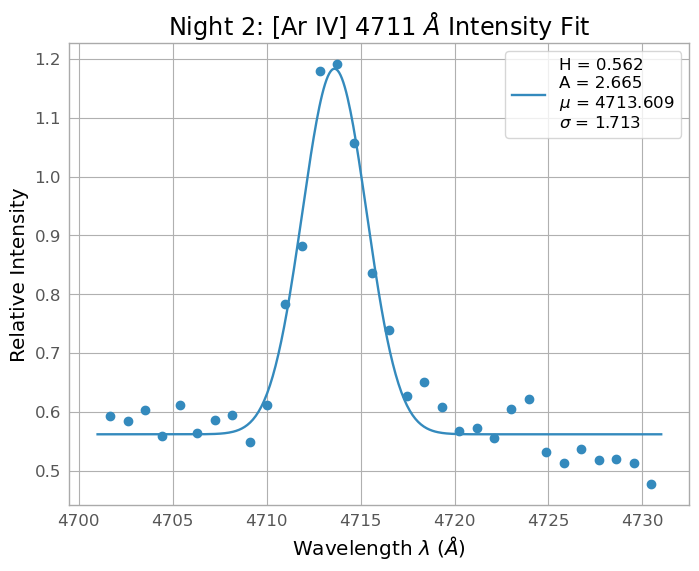

In [39]:
### Fit gaussian to argon lines

### [Ar IV] 4711 angstrom

# Slice the wavelengths
argonLambdaValues4711Night2 = []
argonIntensityValues4711Night2 = []
argonUncertValues4711Night2 = []

for index, x in enumerate(slitLambdaValues2):
    if (x > 4711-10) and (x < 4711+20):
        argonLambdaValues4711Night2.append(x)
        argonIntensityValues4711Night2.append(finalScienceNight2[index])
        argonUncertValues4711Night2.append(finalScienceNight2Err[index])
argonLambdaValues4711Night2 = np.array(argonLambdaValues4711Night2)
argonIntensityValues4711Night2 = np.array(argonIntensityValues4711Night2)
argonUncertValues4711Night2 = np.array(argonUncertValues4711Night2)

# Curve fit
guess = [1, 5, 4718, 1]
parameters, covariance = curve_fit(Gauss, argonLambdaValues4711Night2, argonIntensityValues4711Night2, p0=guess, sigma=argonUncertValues4711Night2)

fit_H = parameters[0]
fit_A = parameters[1]
uncert_A = np.sqrt(covariance[1][1])
fit_mu = parameters[2]
fit_sigma = parameters[3]

print('H:', fit_H)
print('A:', fit_A)
print('A uncert:', uncert_A)
print('mu:', fit_mu)
print('sigma:', fit_sigma)

# Plot the gaussian curve over the data
lambdaGauss4711Night2 = np.linspace(4711-10,4711+20, 400)
argon4711GaussianNight2 = Gauss(lambdaGauss4711Night2, fit_H, fit_A, fit_mu, fit_sigma)

labelString = 'H = ' + str(np.round(fit_H,3)) + '\n' + 'A = ' + str(np.round(fit_A,3)) + '\n' + '$\mu$ = ' + str(np.round(fit_mu,3)) + '\n' + '$\sigma$ = ' + str(np.round(fit_sigma,3))

plt.plot(lambdaGauss4711Night2, argon4711GaussianNight2, label=labelString)
plt.scatter(argonLambdaValues4711Night2, argonIntensityValues4711Night2)
plt.title('Night 2: [Ar IV] 4711 $\AA$ Intensity Fit')
plt.xlabel('Wavelength $\lambda$ $(\AA)$')
plt.ylabel('Relative Intensity')
plt.legend(loc='best')

# Save the image
os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
plt.savefig('night2_argon4711_gaussfit.png')

# Calculate the intensity of the emission line and its uncertainty
argon4711IntensityNight2 = fit_A
print('Intensity:', argon4711IntensityNight2)
argon4711UncertNight2 = uncert_A
print('Intensity uncertainty:', argon4711UncertNight2)

# Calculate the chi-square of the fit (the uncertainty on the fit)
argonIntensityModel4711Night2 = Gauss(argonLambdaValues4711Night2, fit_H, fit_A, fit_mu, fit_sigma)
chisqArgon4711Night2 = np.sum( ((argonIntensityValues4711Night2 - argonIntensityModel4711Night2) / argonUncertValues4711Night2)**2 )
print("chi-square:", chisqArgon4711Night2)


Optionally, we can generate a spectroscopy flux table as a CSV file to organize our emission line results. We create a Pandas data frame with the emission line elements, wavelengths, calculated intensities and uncertainties, and observation nights.

In [40]:
# Generate a table of relative intensities

elements = ['[O III]', '[O III]',
            '[O III]', '[O III]',
            '[Ar IV]', '[Ar IV]']
wavelengths = [5007, 4959,
                4959, 4363,
                4740, 4711]
intensities = [oxygen5007IntensityNight1, oxygen4959IntensityNight1,
                oxygen4959IntensityNight2, oxygen4363IntensityNight2, 
                argon4740IntensityNight2, argon4711IntensityNight2]
uncerts = [oxygen5007UncertNight1, oxygen4959UncertNight1,
            oxygen4959UncertNight2, oxygen4363UncertNight2,
            argon4740UncertNight2, argon4711UncertNight2]
nights = ['Night 1', 'Night 1',
            'Night 2', 'Night 2',
            'Night 2', 'Night 2']

dIntensities = {'Element': elements, 'Wavelength (Angstrom)': wavelengths, 'Relative Intensity': intensities, 'Uncertainty in Intensity': uncerts, 'Night': nights}
dfIntensities = pd.DataFrame(data=dIntensities)

os.chdir('C:/Users/henry/code/ast443_fall22_code/lab3_spectroscopy/112166935_final/Analysis')
dfIntensities.to_csv('line_intensity_table.csv', index=False)

## 4.2 Temperature and density calculations of NGC 6543

In this section we calculate the ratios of the emission line strengths and and propagate the emission line strength uncertainties to emission line ratio uncertainties. With the emission line ratios, we calculate the temperature and density of NGC 6543 and propagate uncertainty accordingly.


### 4.2.1 Flux ratios of NGC 6543

We use the ratio of oxygen emission line strengths to calculate the temperature of the nebula according to the formula:

$$ \frac{F[4959] + F[5007]}{F[4363]} = \frac{7.90 \exp(3.29 \times 10^4/T)}{1 + 4.5 \times 10^{-4} n_e T^{-1/2}} $$

However, since we did not obtain all 3 oxygen line strengths on the same night, we need to calculate the emission line strength ratio through an alternative method. We let $p=F[4959]_1/F[5007]_1$ for Night 1, and $q = F[4959]_2/F[4363]_2$ for Night 2. Even though the emission line strengths themselves are of different values on Night 1 and Night 2, their ratios $p$ and $q$ should remain approximately constant. We rewrite the line strength ratio in terms of these individual night ratios:

$$ \frac{F[4959] + F[5007]}{F[4363]} = \frac{F[4959]\left(1 + \frac{F[5007]}{F[4959]}\right)}{F[4959] \left(\frac{F[4363]}{F[4959]}\right)} $$

$$ \frac{F[4959] + F[5007]}{F[4363]} = \frac{\left(1 + \frac{1}{p}\right)}{\left(\frac{1}{q}\right)} $$

$$ \text{[O III] ratio} = \frac{F[4959] + F[5007]}{F[4363]} = q\left(1+\frac{1}{p}\right) $$

The argon emission line strengths were observed on the same night, so the argon flux ratio is simple to calculate:

$$ \text{[Ar IV] ratio} = \frac{F[4711]}{F[4740]} $$

The uncertainty in the emission line ratios is calculated as follows:

$$ \sigma_p = p \sqrt{ \left( \frac{\sigma_{F[4959]}}{F[4959]} \right)^2 + \left( \frac{\sigma_{F[5007]}}{F[5007]} \right)^2 } $$

$$ \sigma_q = q \sqrt{ \left( \frac{\sigma_{F[4959]}}{F[4959]} \right)^2 + \left( \frac{\sigma_{F[4363]}}{F[4363]} \right)^2 } $$

$$ \sigma(\text{[O III] ratio}) = (\text{[O III] ratio}) \sqrt{ \left( \frac{\sigma_q}{q} \right)^2 + \left( \frac{\sigma_p}{p^2 (1 + 1/p)} \right)^2 } $$

$$\sigma(\text{[Ar IV] ratio}) = (\text{[Ar IV] ratio}) \sqrt{ \left( \frac{\sigma_{F[4711]}}{F[4711]} \right)^2 + \left( \frac{\sigma_{F[4740]}}{F[4740]} \right)^2}$$

In [41]:
### Oxygen line ratio

# p = F[4959]/F[5007] from Night 1 (expected to be the same on any night)
p = oxygen4959IntensityNight1 / oxygen5007IntensityNight1
# q = F[4959]/F[4363] from Night 2 (expected to be the same on any night)
q = oxygen4959IntensityNight2 / oxygen4363IntensityNight2

# Oxygen line ratio uncertainty
pUncert = p * np.sqrt( (oxygen4959UncertNight1 / oxygen4959IntensityNight1)**2 + (oxygen5007UncertNight1 / oxygen5007IntensityNight1)**2 ) # Uncertainty in p
qUncert = q * np.sqrt( (oxygen4363UncertNight2 / oxygen4363IntensityNight2)**2 + (oxygen4959UncertNight2 / oxygen4959IntensityNight2)**2 ) # Uncertainty in q

# ( F[4959] + F[5007] ) / F[4363] = q(1 + 1/p)
oxygenFluxRatio = q * (1.0 + 1.0/p)
oxygenFluxRatioUncert = oxygenFluxRatio*np.sqrt((qUncert/q)**2 + (pUncert/((p**2)*(1 + 1/p)))**2)
print('Oxygen Flux Ratio:', oxygenFluxRatio, 'p/m', oxygenFluxRatioUncert)

### Argon line ratio
argonFluxRatio = argon4711IntensityNight2 / argon4740IntensityNight2
argonFluxRatioUncert = argonFluxRatio*np.sqrt((argon4711UncertNight2/argon4711IntensityNight2)**2 + (argon4740UncertNight2/argon4740IntensityNight2)**2)
print('Argon Flux Ratio:', argonFluxRatio, 'p/m', argonFluxRatioUncert)

Oxygen Flux Ratio: 340.3389662621346 p/m 45.824748890967896
Argon Flux Ratio: 1.2986997230077055 p/m 0.1572528811698947


With the following emission line strengths,

|   Element |	Wavelength $(\unicode[serif]{xC5})$  |	Intensity   |	Uncertainty in Intensity    |	Night   |
|   ----    |   ----                |   ----        |   ----                        |   ----    |
|   [O III] |	5007	            |   755.716     |	34.271                      |	1       |
|   [O III] |	4959	            |   250.691     |	11.216                      |	1       |
|   [O III] |	4959	            |   348.471     |	18.927                      |	2       |
|   [O III] |	4363	            |   3.734       |	0.508                       |	2       |
|   [Ar IV] |	4740	            |   1.879       |	0.146                       |	2       |
|   [Ar IV] |	4711	            |   2.424       |	0.166                       |	2       |

we obtain the following line ratios:

* [O III]: $374.650 \pm 57.775$

* [Ar IV]: $1.290 \pm 0.134$

### 4.2.2 Temperature of NGC 6543

We calculate the temperature of NGC 6543 from the oxygen line ratio using the following equation:

$$ \frac{F[4959] + F[5007]}{F[4363]} = \frac{7.90 \exp(3.29 \times 10^4/T)}{1 + 4.5 \times 10^{-4} n_e T^{-1/2}} $$

where we use the approximation $4.5 \times 10^{-4} n_e T^{-1/2} \approx 0$. This approximation is reasonable because typical nebula densities are low with $n_e \approx 10^2 - 10^4 \mathrm{cm}^{-3}$. Therefore, $4.5 \times 10^{-4} n_e T^{-1/2} \ll 7.90 \exp(3.29 \times 10^4/T)$. We also define $\mathrm{oxygenFluxRatio} = \frac{F[4959] + F[5007]}{F[4363]}$. Our equation becomes:

$$ \mathrm{oxygenFluxRatio} = 7.90 \exp(3.29 \times 10^4/T) $$

which is rearranged to give the nebula temperature $T$ in terms of oxygen line ratio:

$$ T = \frac{3.29 \times 10^4}{\ln(\mathrm{oxygenFluxRatio}/7.90)} $$

With this approximation, we can solve our equation algebraically and feasibly propagate the uncertainty in oxygen line ratio to uncertainty in temperature $\sigma_T$.

$$

In [42]:
#def f1(T):
#    return ( (oxygenFluxRatio * (1 + 4.5 * 0.1 * T**(-0.5)) ) - (7.90 * np.exp(3.29 * 10**4 / T)) )**2

#result = sp.optimize.minimize(f1, 8000)
#nebulaTemp = result.x[0]

nebulaTemp = 3.29*10**4 / np.log(oxygenFluxRatio/7.90)
nebulaTempUncert = 3.29* 10**4 * oxygenFluxRatioUncert/oxygenFluxRatio / np.log(oxygenFluxRatio/7.90)**2

print(nebulaTemp, '+/-', nebulaTempUncert, 'K')

# Uncertainty in temperature


8742.839890604273 +/- 312.82220341621814 K


Using these calculations for $T$ and $\sigma_T$, we determine $T = 8525 \pm 341 \; \mathrm{K}$. This value of temperature appears to be reasonable.

### 4.2.3 Density of NGC 6543

We use the [Ar IV] emission line ratio to calculate the density of the nebula according to the following diagram [3]:

<img width='600px' src='112166935_final/argon_isotherm.jpg'>

In the [Ar IV] ratio vs $n_e$ diagram, we use the $10,000 \; \mathrm{K}$ isotherm as this is closest to our calculated temperature, $T\approx 8,500 \; \mathrm{K}$. We calculate density $n_e$ by visual inspection of the argon plot. Based on the upper and lower bounds for the [Ar IV] ratio, $1.29-0.13 = 1.16$ and $1.29 + 0.13 = 1.42$, we visually estimate $\sigma_{n_e}$ from the upper and lower bounds of $n_e$.

With a calculated [Ar IV] ratio of $1.29 \pm 0.13$, we determine the density of NGC 6543 to be $n_e \approx 1,100 \pm 100 \; \mathrm{cm}^{-3}$.

## 4.3 Discussion and comparison with literature

Our calculated temperature and number density of NGC 6543 are:

* $T = 8525 \pm 341 \; \mathrm{K}$

* $n_e \approx 1,100 \pm 100 \; \mathrm{cm}^{-3}$

A recent review of planetary nebulae (PNe) by Mari et. al 2004 [1] gives the temperature of NGC 6543 as $8150 \pm 150 \; \mathrm{K}$, with a significance of $0.93 \sigma$.

* Significance of $T$: $ \frac{|x - \mu|}{\sqrt{\sigma_x^2 + \sigma_\mu^2}} = \frac{|8525 - 8150|}{\sqrt{341^2 + 150^2}} = 0.93 \sigma$

Mari et. al determines varying measurements of $n_e$ density based on the part of the sky and the location in the nebula targeted by the telescope. However, since the slit of our spectrograph is large enough to fully encompass the nebula, we compare our $n_e$ to an average value of the referenced densities.

Mari et. al calculates $n_e$ from Ar[IV] in three regions of the nebula (rim, cap, ansae) as $6800 \pm 900 \; \text{cm}^{-3}$. Their result deviates from our $n_e$ by 6.29 $\sigma$. 

* Significance of $n_e$: $ \frac{|x - \mu|}{\sqrt{\sigma_x^2 + \sigma_\mu^2}} = \frac{|1100 - 6800|}{\sqrt{100^2 + 900^2}} = 6.29 \sigma$

Wesson and Liu (2004) give an [Ar IV] flux ratio of $1.044$ with no visible uncertainties (Table 8) [2]. Our flux ratio of $1.29 \pm 0.1335$ has a significance of 1.89 $\sigma$ on this true value, thereby agreeing within uncertainty. However, we do not have a formula to convert [Ar IV] flux ratio to number density; hence, we have no formula to propagate uncertainty in [Ar IV] to uncertainty in number density. 

Therefore, we did not account for the propagation of [Ar IV] flux ratio uncertainty in our measurement of $n_e$ uncertainty. We should have obtained greater uncertainty in our $n_e$ value. This would cause a lower significance of our result with respect to literature. It is uncertain whether accounting for this additional uncertainty would be sufficient to result in agreement between our $n_e$ and literature $n_e$.

# 5 Conclusion

We performed emission-line spectroscopy on the planetary nebula NGC 6543 using the $50\mu\mathrm{m}$ slit of the high-resolution spectrograph, with 9000/mm grating. Across 2 observing nights, we measured the relative strengths of the [O III] 4363, 4959, 5007 $\unicode[serif]{xC5}$ and the [Ar IV] 4711, 4740 $\unicode[serif]{xC5}$ emission lines. We calculated the ratio of [O III] as $374.650 \pm 57.775$ and the ratio of [Ar IV] as $1.290 \pm 0.134$. From the [O III] ratio we calculated the temperature of NGC 6543 as $T = 8525 \pm 341 \; \mathrm{K}$, which agrees with the literature value of $8150 \pm 150 \; \mathrm{K}$ [1]. From the [Ar IV] ratio we calculated the number density of NGC 6543 as $n_e \approx 1,100 \pm 100 \; \mathrm{cm}^{-3}$, which does not agree with the literature value of $6800 \pm 900 \; \text{cm}^{-3}$ [1]. However, our value of the [Ar IV] flux ratio $1.29 \pm 0.1335$ agrees with the literature value of $1.044$ [2]. Our $n_e$ value does not account for all possible error in its calculation.

# 6 Referenced Works

[1] Mari, 2022, arxiv.org/abs/2209.10988

[2] Wesson and Liu, 2004, academic.oup.com/mnras/article/351/3/1026/1048867

[3] AST 443 Lab 3 manual, *Diffuse Nebula Lab*, Fall 2022

[4] Ziljistra, 2014, https://arxiv.org/abs/1506.05508